#Database

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
!pip install watermark

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [5]:
# Import of libraries

# System libraries
import re
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.10.12
Author: Library versions

seaborn   : 0.13.1
numpy     : 1.26.4
plotly    : 5.15.0
re        : 2.2.1
watermark : 2.4.3
matplotlib: 3.7.1
pandas    : 2.1.4



In [6]:
# Set the display.max_columns option to None
pd.set_option('display.max_columns', None)

# Loading dataset
train_df = pd.read_csv("/content/data (1).csv")
train_df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871     1.0950      0.9053   
1           0.1812                 0.05667     0.5435      0.7339   
2           0.2069                 0.05999     0.7456      0.7869   
3           0.2597                 0.09744     0.4956      1.1560   
4           0.1809                 0.05883     0.7572      0.7813   
..             ...                     ...        ...         ...   
564         0.1726                 0.05623     1.1760      1.2560   
565         0.1752                 0.05533     0.7655      2.4630   
566         0.1590                 0.05648     0.4564      1.0750   
567         0.2397                 0.07016     0.7260      1.5950   
568         0.1587                 0.05884     0.3857      1.4280   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
0           8.589   153.40       0.006399         0.04904       0.05373   
1           3.398    74.08       0.005225         0.01308       0.01860   
2           4.585    94.03       0.006150         0.04006       0.03832   
3           3.445    27.23       0.009110         0.07458       0.05661   
4           5.438    94.44       0.011490         0.02461       0.05688   
..            ...      ...            ...             ...           ...   
564         7.673   158.70       0.010300         0.02891       0.05198   
565         5.203    99.04       0.005769         0.02423       0.03950   
566         3.425    48.55       0.005903         0.03731       0.04730   
567         5.772    86.22       0.006522         0.06158       0.07117   
568         2.548    19.15       0.007189         0.00466       0.00000   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0              0.01587      0.03003              0.006193        25.380   
1              0.01340      0.01389              0.003532        24.990   
2              0.02058      0.02250              0.004571        23.570   
3              0.01867      0.05963              0.009208  

In [7]:
# Viewing first 5 data
train_df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN

In [8]:
# Viewing 5 latest data
train_df.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
564         0.1726                 0.05623     1.1760       1.256   
565         0.1752                 0.05533     0.7655       2.463   
566         0.1590                 0.05648     0.4564       1.075   
567         0.2397                 0.07016     0.7260       1.595   
568         0.1587                 0.05884     0.3857       1.428   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
564         7.673   158.70       0.010300         0.02891       0.05198   
565         5.203    99.04       0.005769         0.02423       0.03950   
566         3.425    48.55       0.005903         0.03731       0.04730   
567         5.772    86.22       0.006522         0.06158       0.07117   
568         2.548    19.15       0.007189         0.00466       0.00000   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
564            0.02454      0.01114              0.004239        25.450   
565            0.01678      0.01898              0.002498        23.690   
566            0.01557      0.01318              0.003892        18.980   
567            0.01664      0.02324              0.006185        25.740   
568            0.00000      0.02676              0.002783         9.456   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564          26.40           166.10      2027.0           0.14100   
565          38.25           155.00      1731.0           0.11660   
566          34.12           126.70      1124.0           0.11390   
567          39.42           184.60      1821.0           0.16500   
568          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN

In [9]:
# Info data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
# Type data
train_df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst             float64
fractal_dimension_worst    float64
Unnamed: 32                float64
dtype: object

In [11]:
# Viewing rows and columns
train_df.shape

(569, 33)

# Data preprocessing

In [12]:
train_df['diagnosis'] = train_df['diagnosis'].map({'M': 1, 'B': 0})
train_df

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0                0.14710         0.2419                 0.07871     1.0950   
1                0.07017         0.1812                 0.05667     0.5435   
2                0.12790         0.2069                 0.05999     0.7456   
3                0.10520         0.2597                 0.09744     0.4956   
4                0.10430         0.1809                 0.05883     0.7572   
..                   ...            ...                     ...        ...   
564              0.13890         0.1726                 0.05623     1.1760   
565              0.09791         0.1752                 0.05533     0.7655   
566              0.05302         0.1590                 0.05648     0.4564   
567              0.15200         0.2397                 0.07016     0.7260   
568              0.00000         0.1587                 0.05884     0.3857   

     texture_se  perimeter_se  area_se  smoothness_se  compactness_se  \
0        0.9053         8.589   153.40       0.006399         0.04904   
1        0.7339         3.398    74.08       0.005225         0.01308   
2        0.7869         4.585    94.03       0.006150         0.04006   
3        1.1560         3.445    27.23       0.009110         0.07458   
4        0.7813         5.438    94.44       0.011490         0.02461   
..          ...           ...      ...            ...             ...   
564      1.2560         7.673   158.70       0.010300         0.02891   
565      2.4630         5.203    99.04       0.005769         0.02423   
566      1.0750         3.425    48.55       0.005903         0.03731   
567      1.5950         5.772    86.22       0.006522         0.06158   
568      1.4280         2.548    19.15       0.007189         0.00466   

     concavity_se  concave points_se  symmetry_se  fractal_dimension_se  \
0         0.05373            0.01587      0.03003              0.006193   
1         0.01860            0.01340      0.01389              0.003532   
2         0.03832            0.02058      0.02250              0.004571   
3         0.05661            0.01867      0.05963              0.009208   
4         0.05688            0.01885      0.01756              0.005115   
..            ...                ...          ...                

In [13]:
# Remove ID column for analysis
train_df = train_df.drop(columns=['id'])
train_df = train_df.drop(columns=['Unnamed: 32'])
train_df


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871     1.0950      0.9053   
1           0.1812                 0.05667     0.5435      0.7339   
2           0.2069                 0.05999     0.7456      0.7869   
3           0.2597                 0.09744     0.4956      1.1560   
4           0.1809                 0.05883     0.7572      0.7813   
..             ...                     ...        ...         ...   
564         0.1726                 0.05623     1.1760      1.2560   
565         0.1752                 0.05533     0.7655      2.4630   
566         0.1590                 0.05648     0.4564      1.0750   
567         0.2397                 0.07016     0.7260      1.5950   
568         0.1587                 0.05884     0.3857      1.4280   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
0           8.589   153.40       0.006399         0.04904       0.05373   
1           3.398    74.08       0.005225         0.01308       0.01860   
2           4.585    94.03       0.006150         0.04006       0.03832   
3           3.445    27.23       0.009110         0.07458       0.05661   
4           5.438    94.44       0.011490         0.02461       0.05688   
..            ...      ...            ...             ...           ...   
564         7.673   158.70       0.010300         0.02891       0.05198   
565         5.203    99.04       0.005769         0.02423       0.03950   
566         3.425    48.55       0.005903         0.03731       0.04730   
567         5.772    86.22       0.006522         0.06158       0.07117   
568         2.548    19.15       0.007189         0.00466       0.00000   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0              0.01587      0.03003              0.006193        25.380   
1              0.01340      0.01389              0.003532        24.990   
2              0.02058      0.02250              0.004571        23.570   
3              0.01867      0.05963              0.009208        14.910   
4              0.01885      0.01756              0.005115        22.540   
..         

In [14]:
# Copying data
df = train_df.copy()

In [15]:
# Exploratory data analysis (EDA)
print("\nDescriptive statistics of the training set")
train_df.describe().T


Descriptive statistics of the training set


count        mean         std         min  \
diagnosis                569.0    0.372583    0.483918    0.000000   
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
diagnosis                  0.000000    0.000000     1.000000     1.00000  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.72000

In [16]:
# Analysis of categorical and numerical variables
categorical_features = train_df.select_dtypes(include=['object']).columns
numerical_features = train_df.select_dtypes(include=[np.number]).columns

print("\nCategorical Variables:", categorical_features)
print("Numeric Variables:", numerical_features)


Categorical Variables: Index([], dtype='object')
Numeric Variables: Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [17]:
# Analysis of categorical variables
for col in categorical_features:
    print(f"\nDistribution of categorical variable {col}:")
    print(train_df[col].value_counts())


Distribution of target variable 'Target':
diagnosis
0    357
1    212
Name: count, dtype: int64


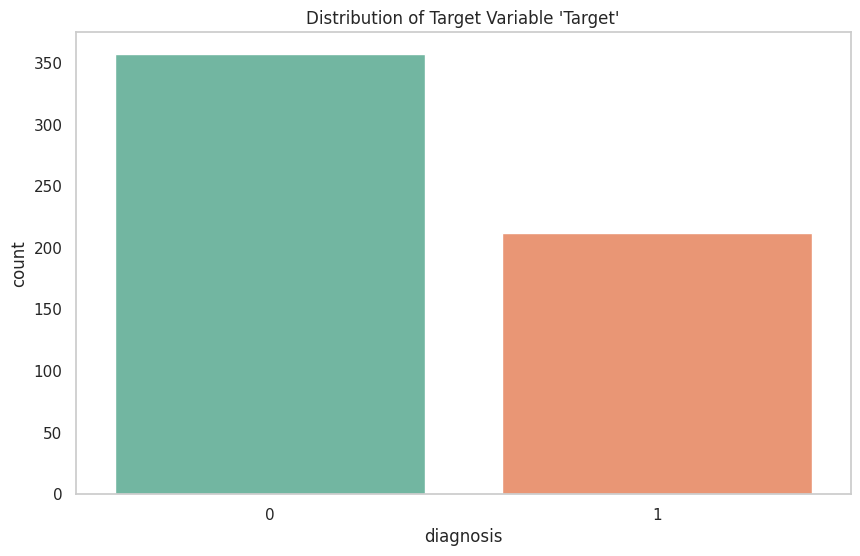

In [18]:
# Analysis of target variable 'Target'
print("\nDistribution of target variable 'Target':")
print(train_df['diagnosis'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='diagnosis', palette='Set2')
plt.title("Distribution of Target Variable 'Target'")
plt.grid(False)
plt.show()

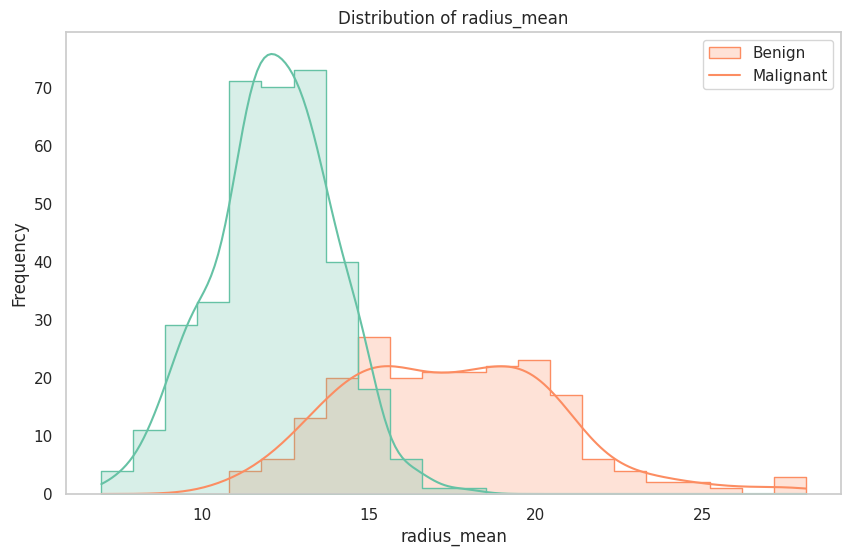

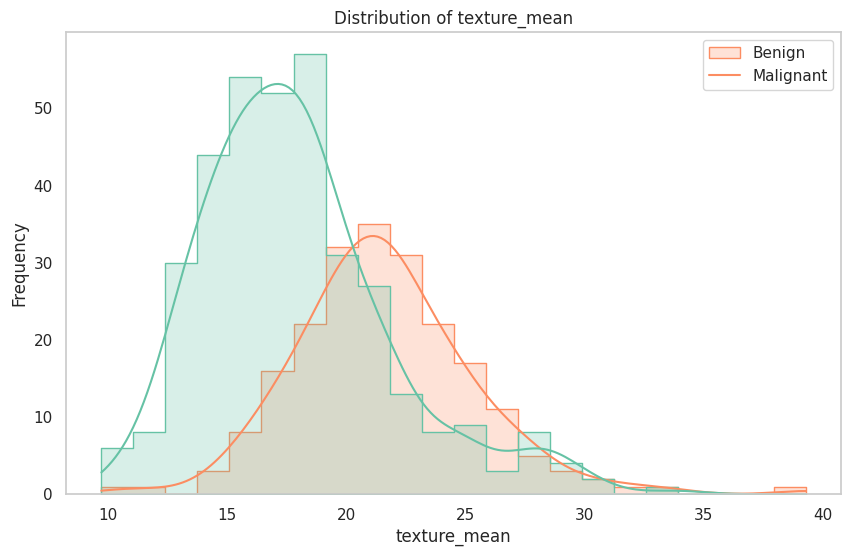

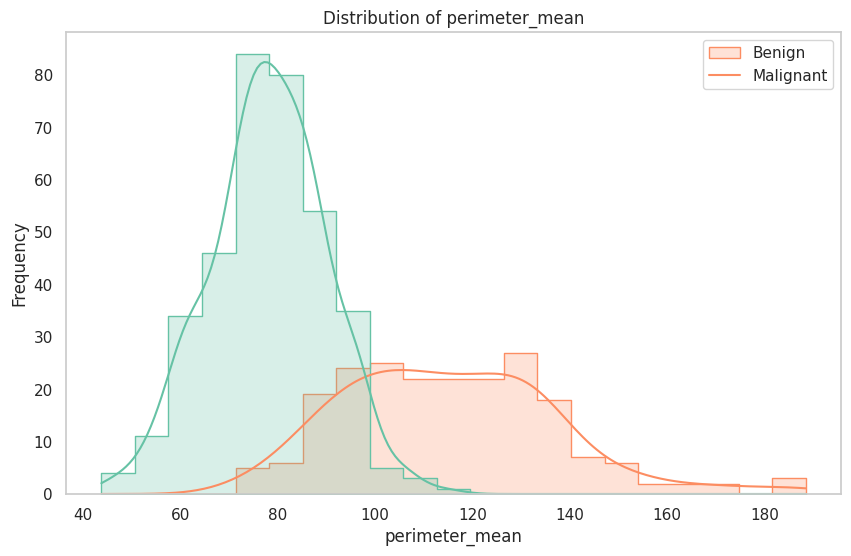

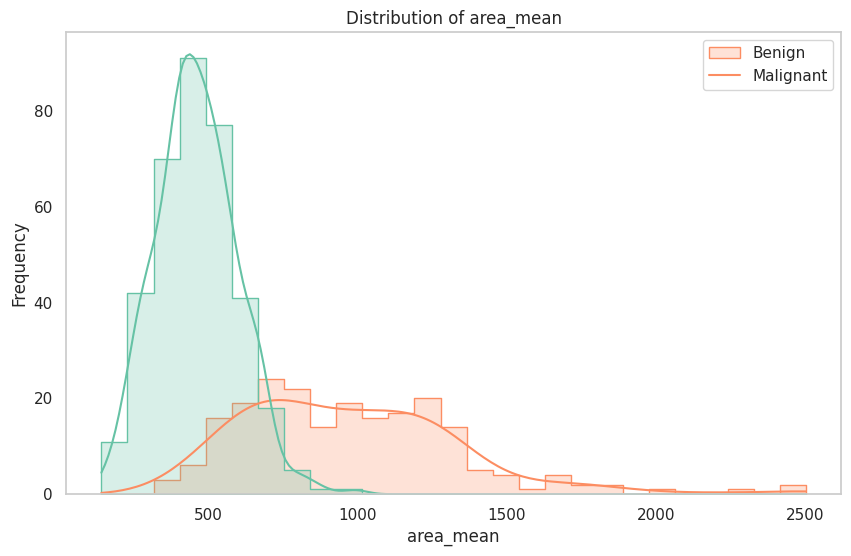

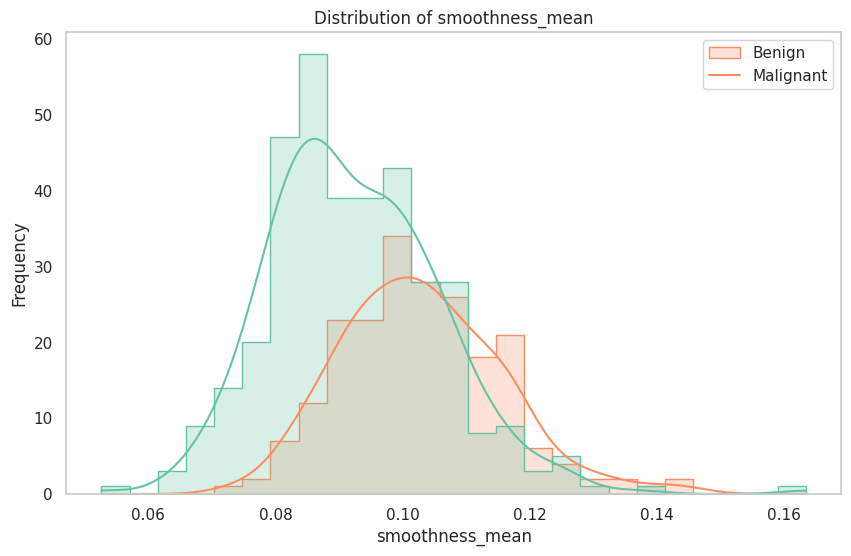

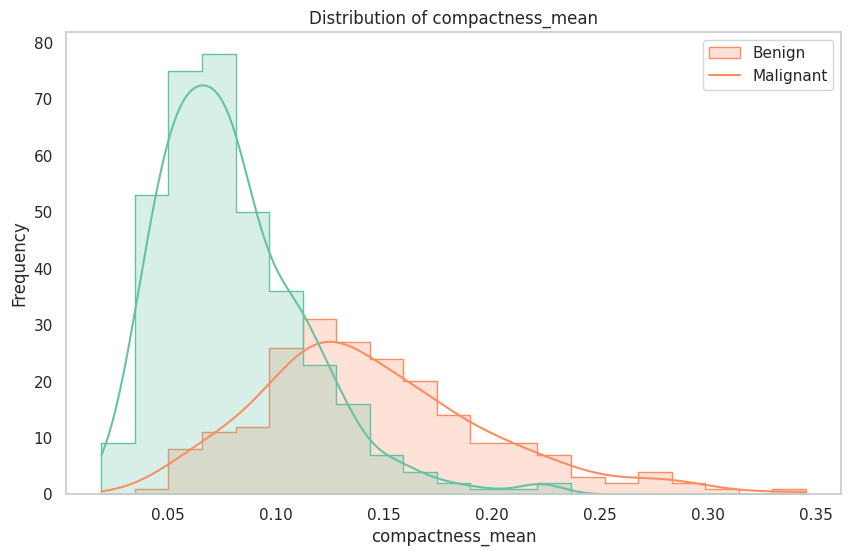

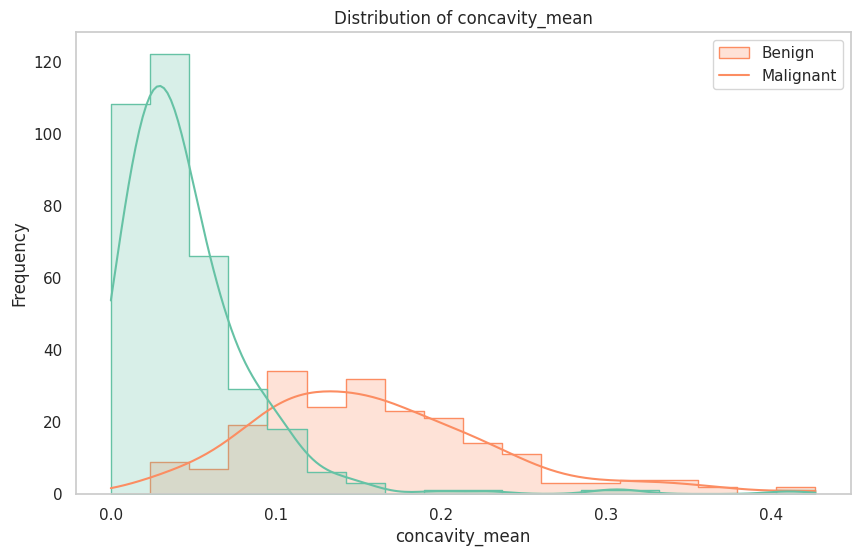

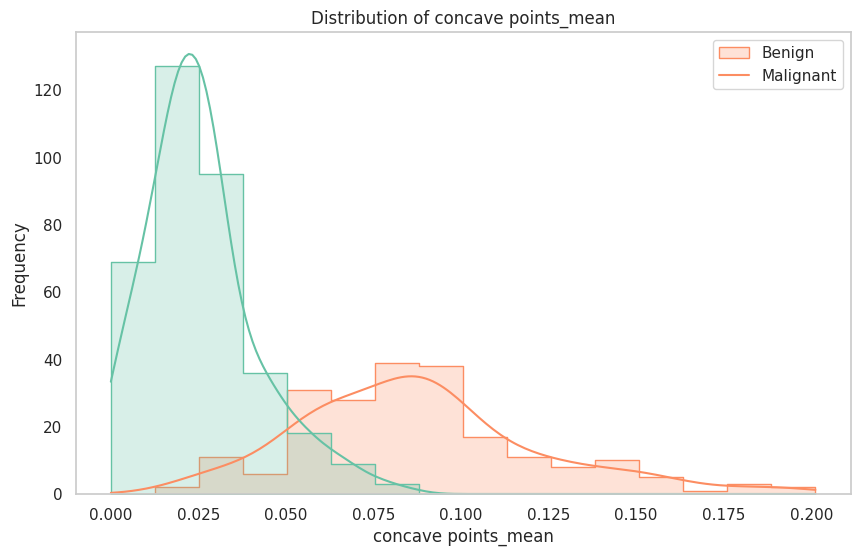

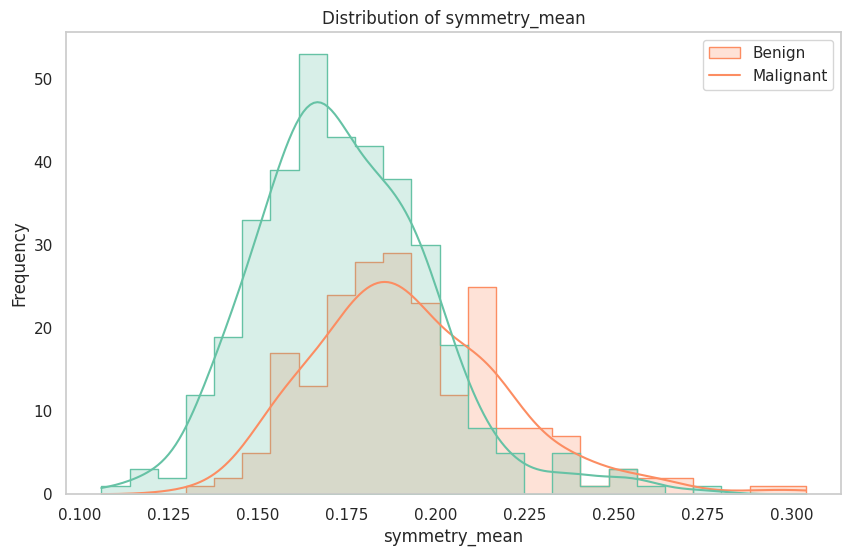

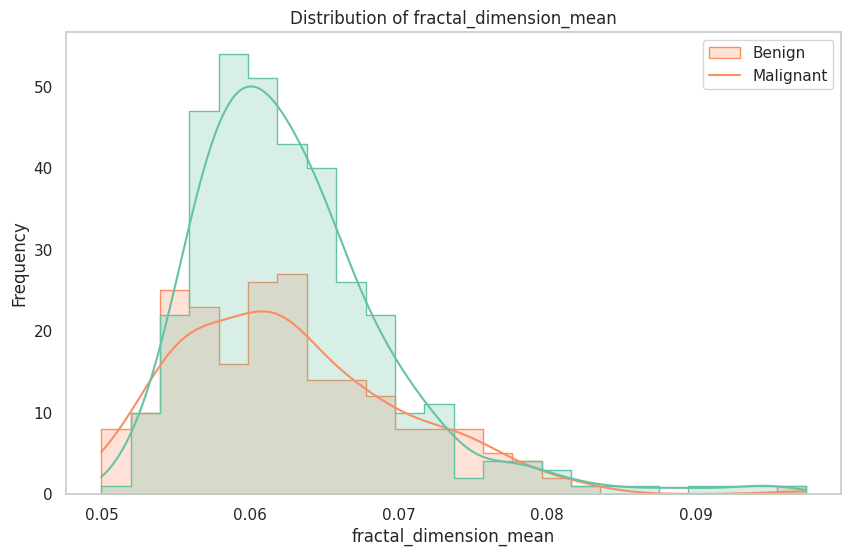

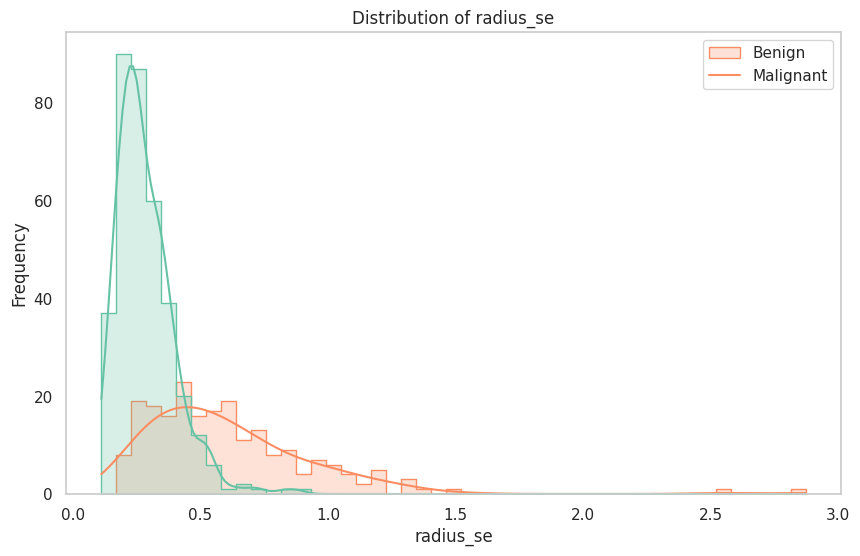

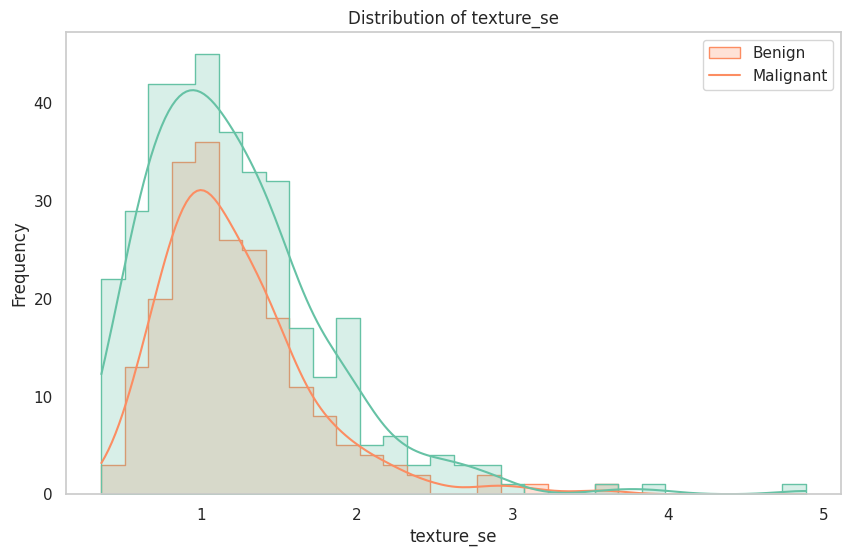

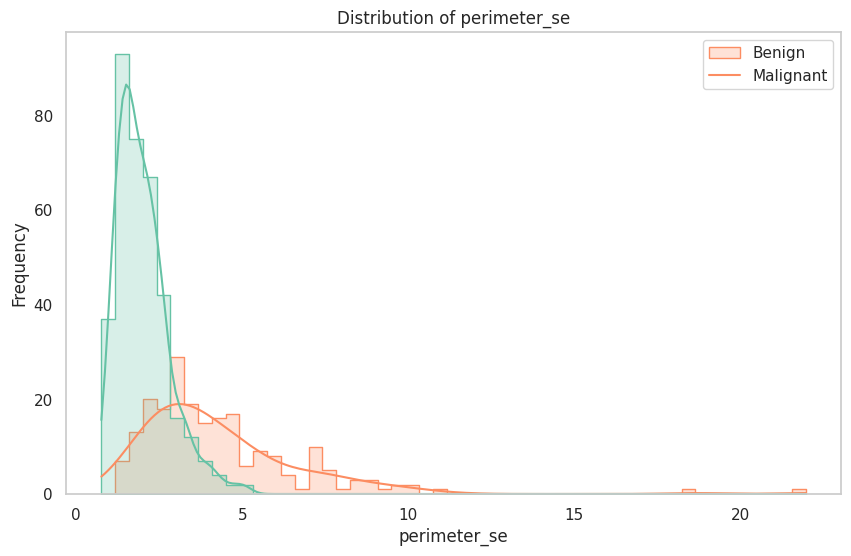

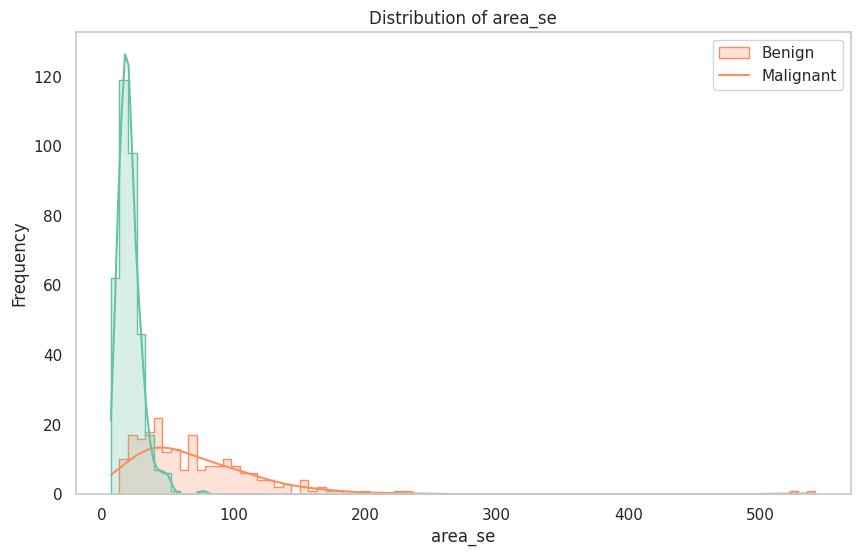

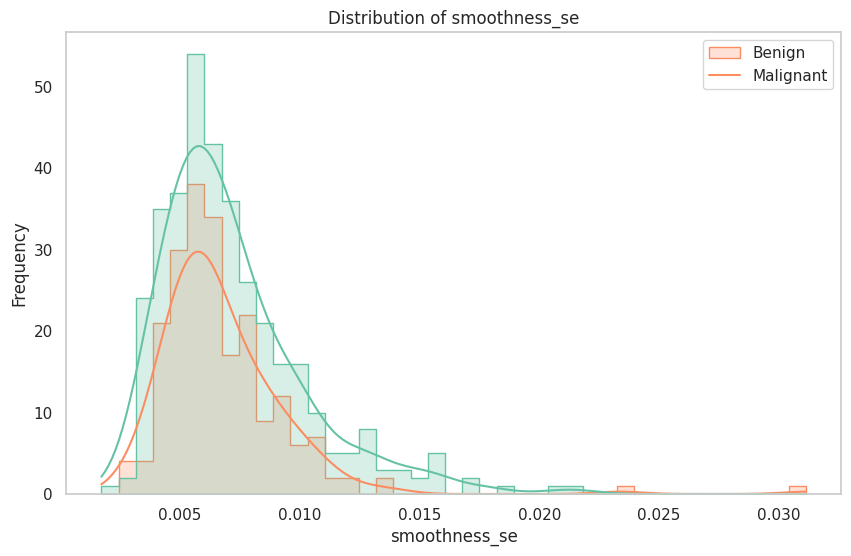

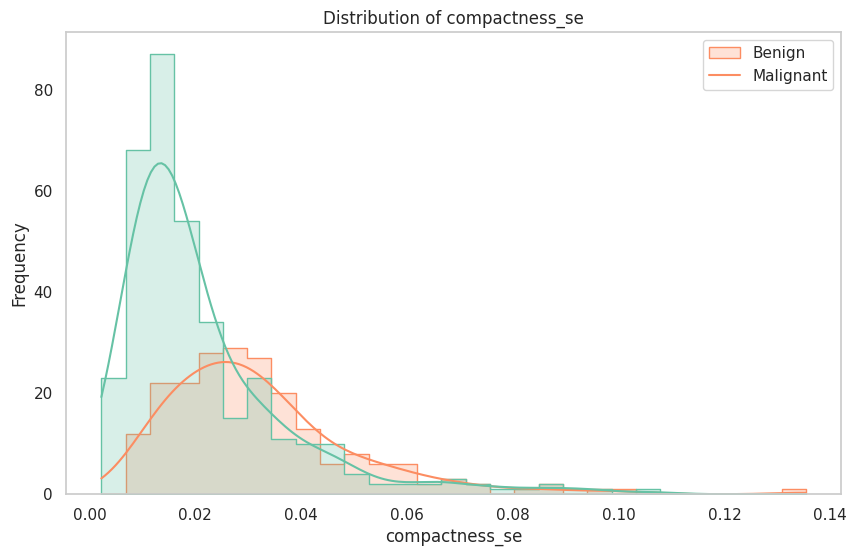

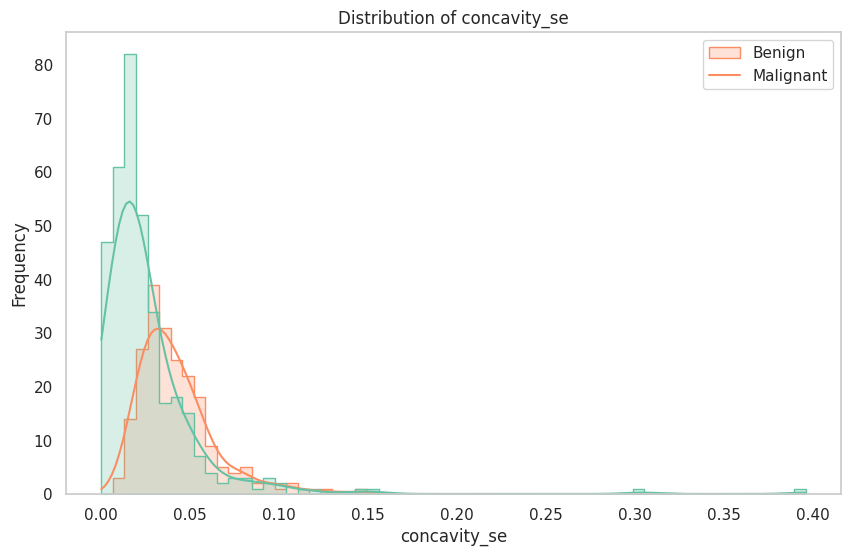

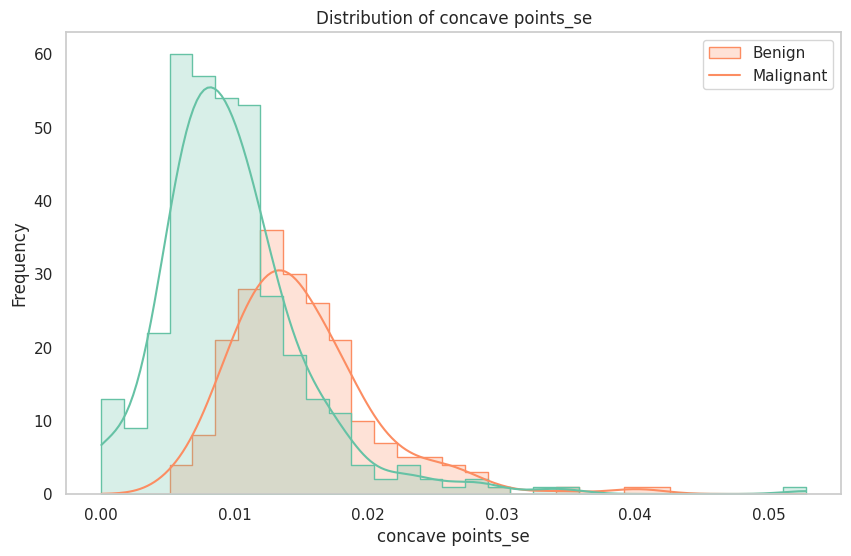

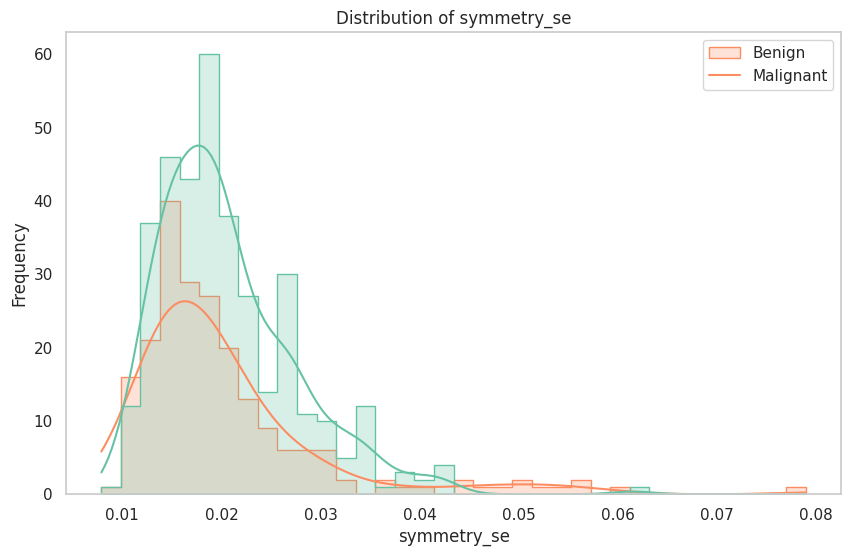

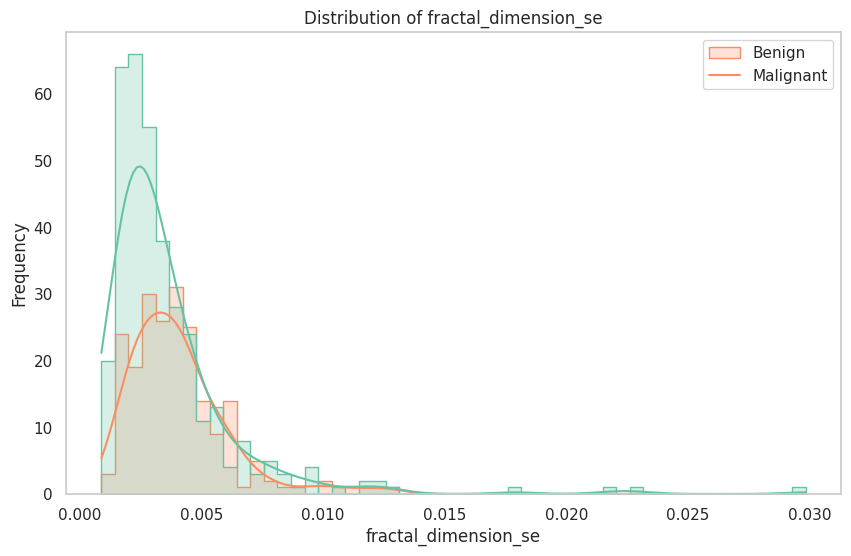

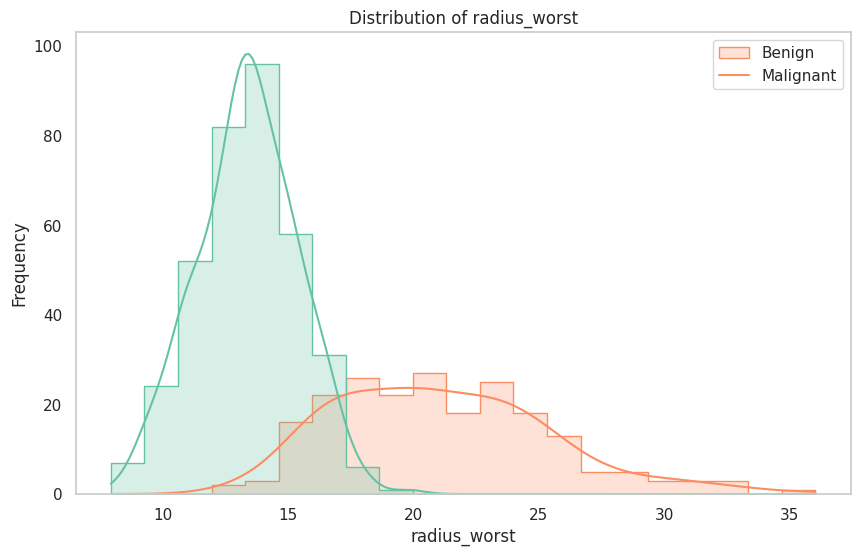

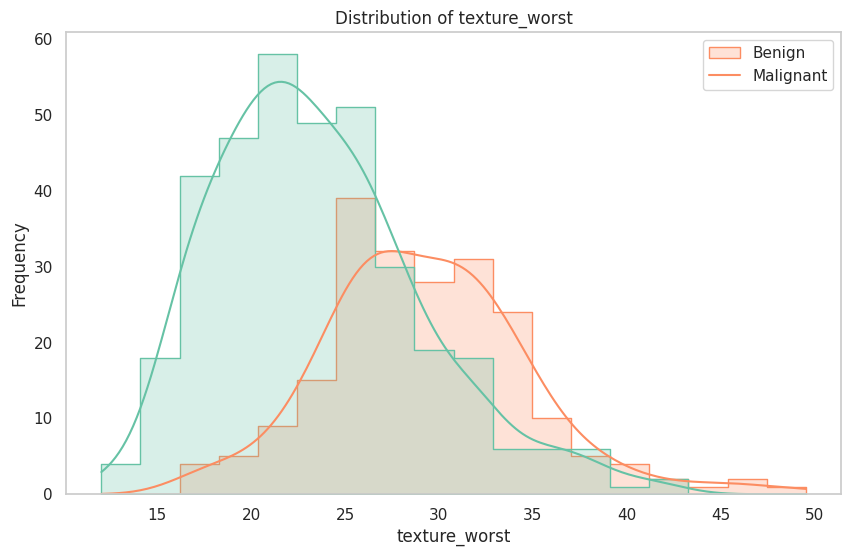

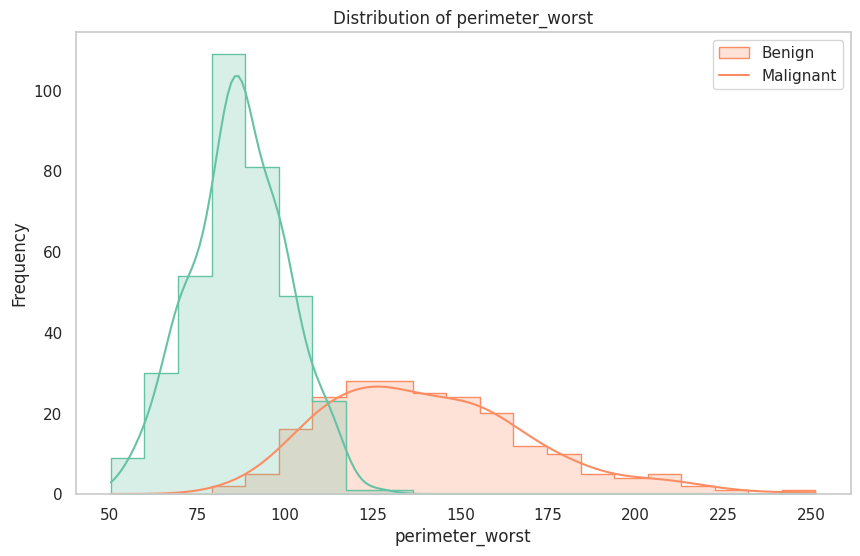

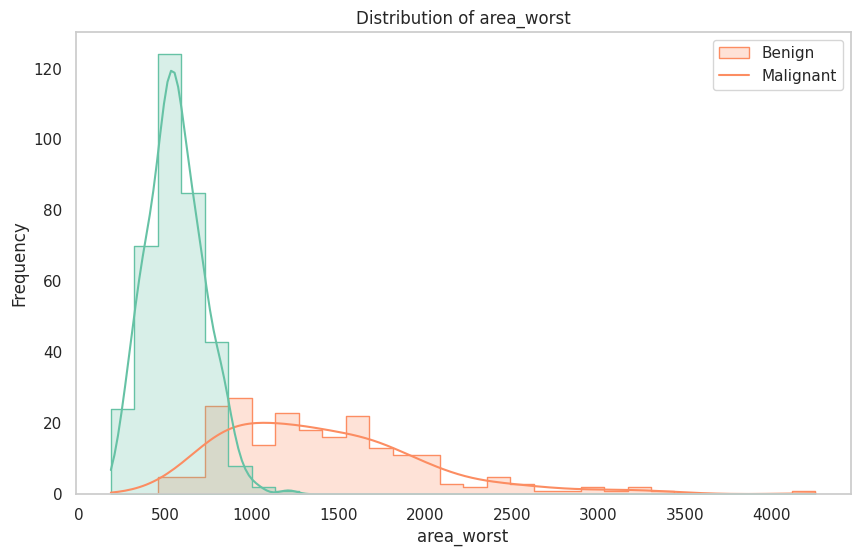

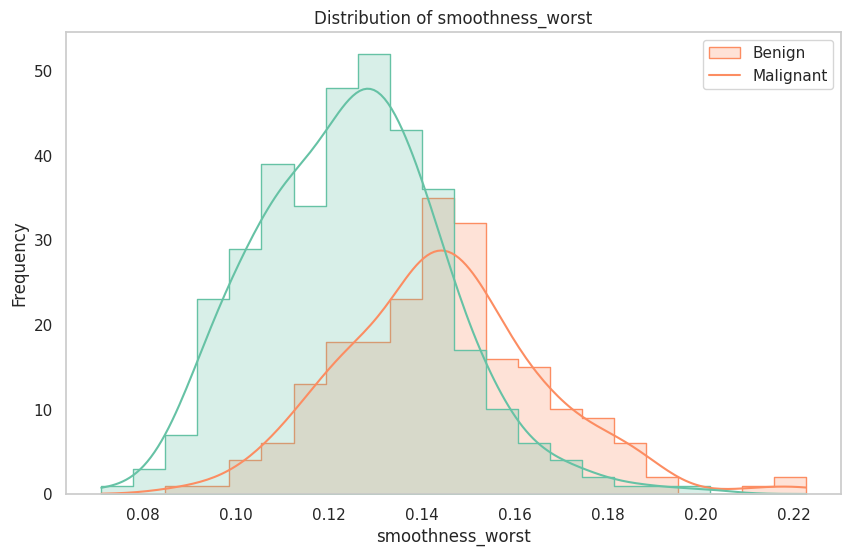

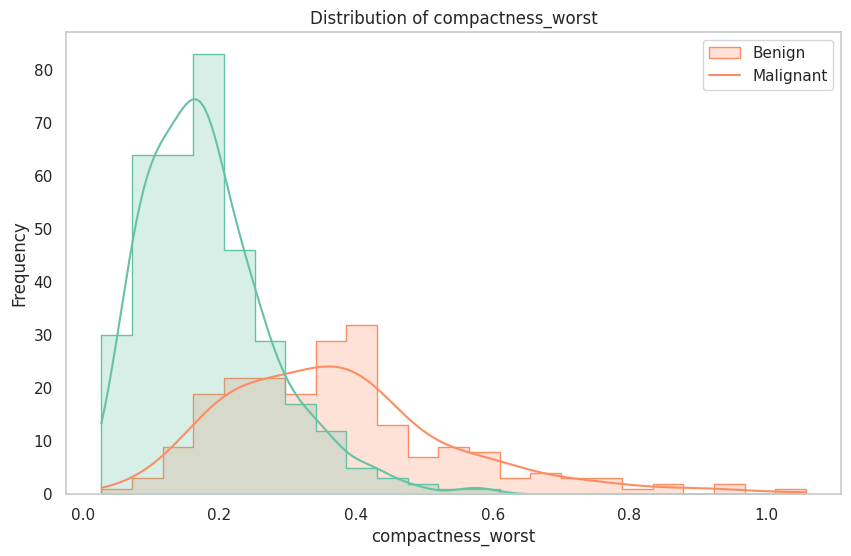

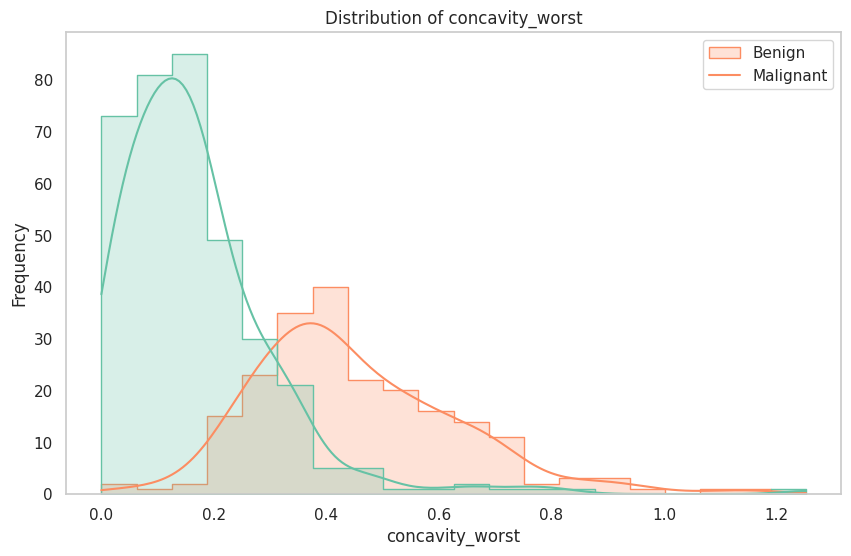

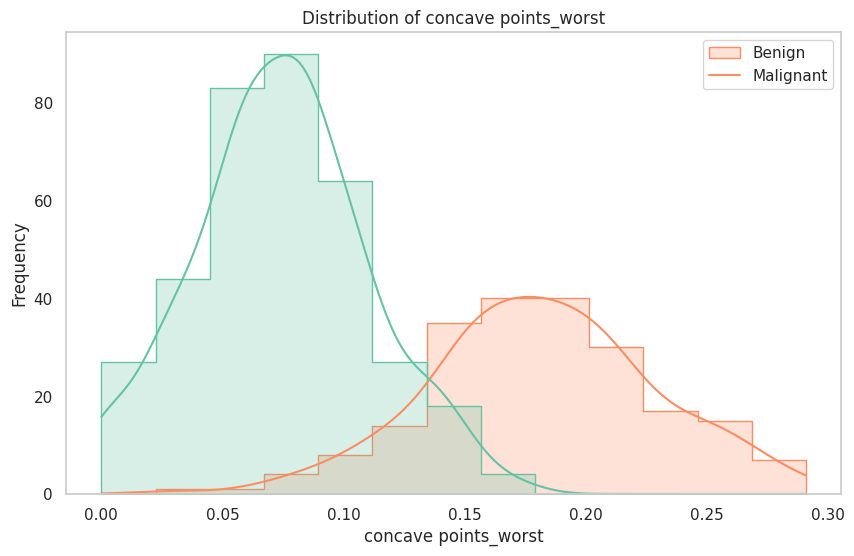

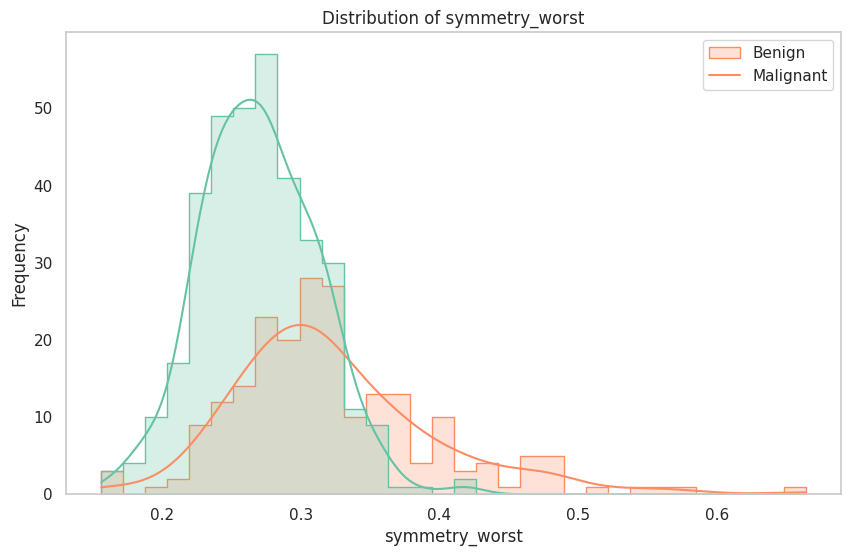

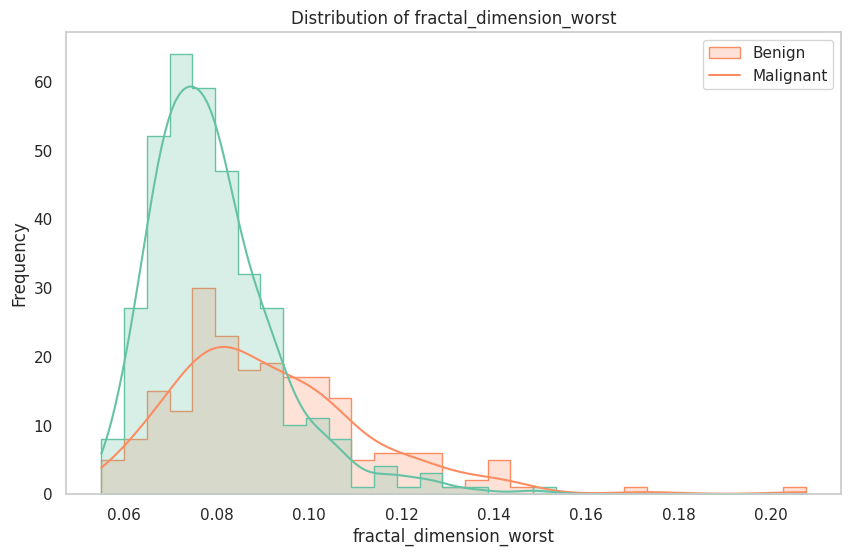

In [19]:
# List all features (excluding 'Diagnosis')
features = train_df.columns[1:]

# Create distribution plots for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df, x=feature, hue='diagnosis', kde=True, element='step', palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(['Benign', 'Malignant'])
    plt.grid(False)
plt.show()

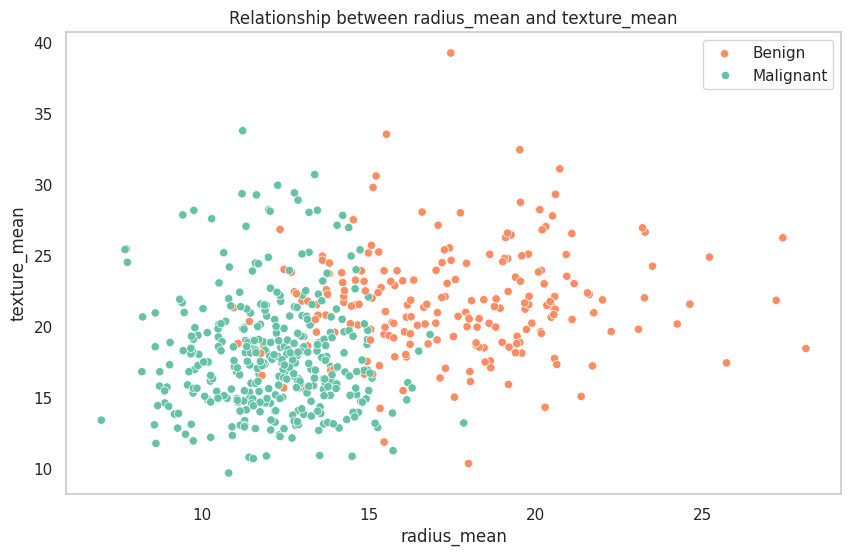

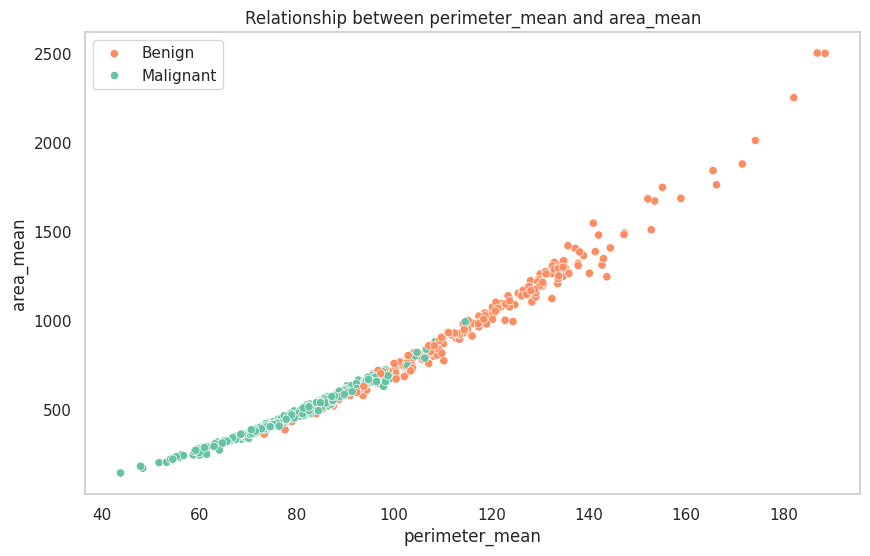

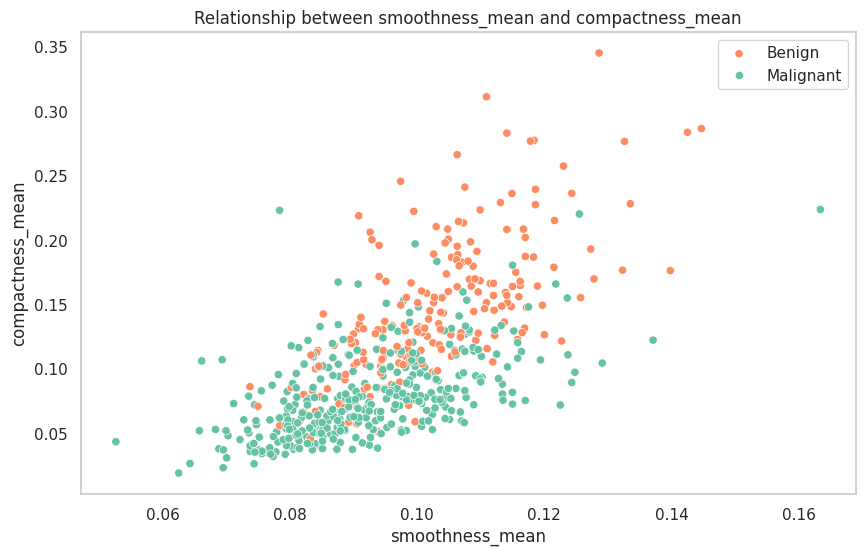

In [20]:
# List some feature combinations for scatter plots
feature_pairs = [('radius_mean', 'texture_mean'),
                 ('perimeter_mean', 'area_mean'),
                 ('smoothness_mean', 'compactness_mean')]

# Create scatter plots for each pair of features
for x_feature, y_feature in feature_pairs:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_feature, y=y_feature, hue='diagnosis', data=train_df, palette='Set2')
    plt.title(f'Relationship between {x_feature} and {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend(['Benign', 'Malignant'])
    plt.grid(False)
plt.show()

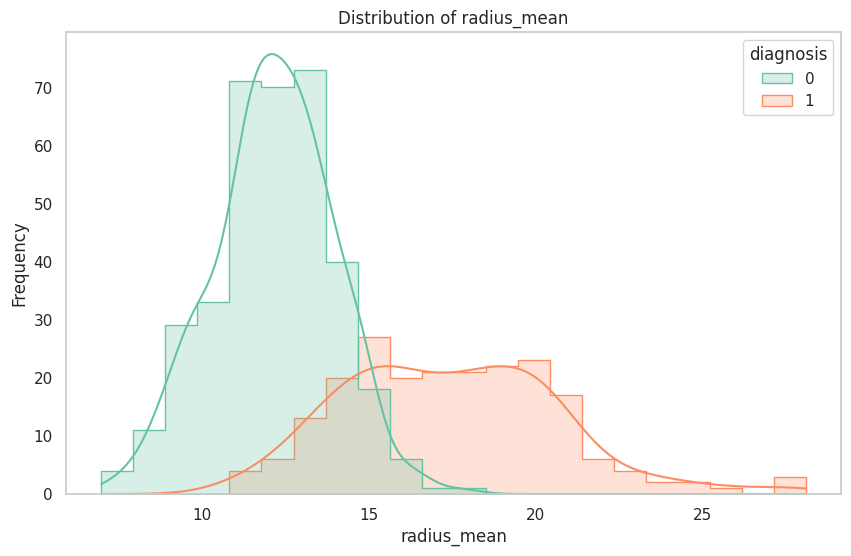

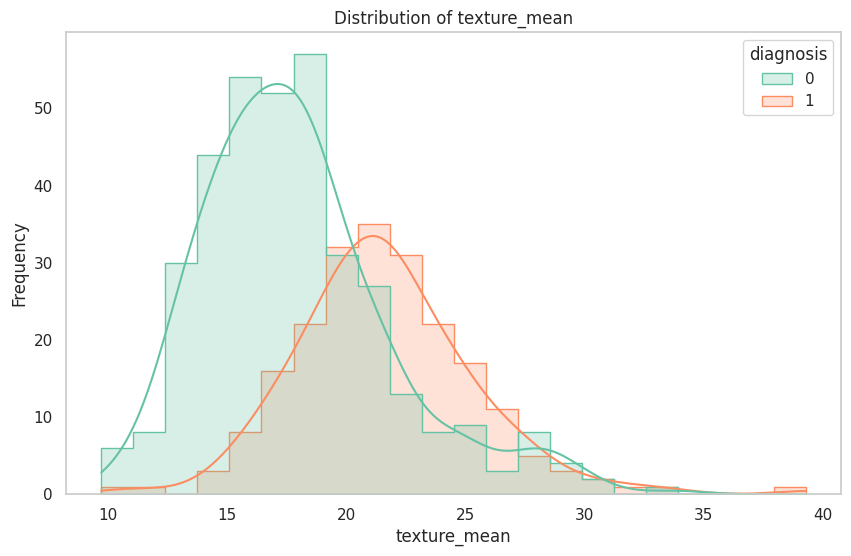

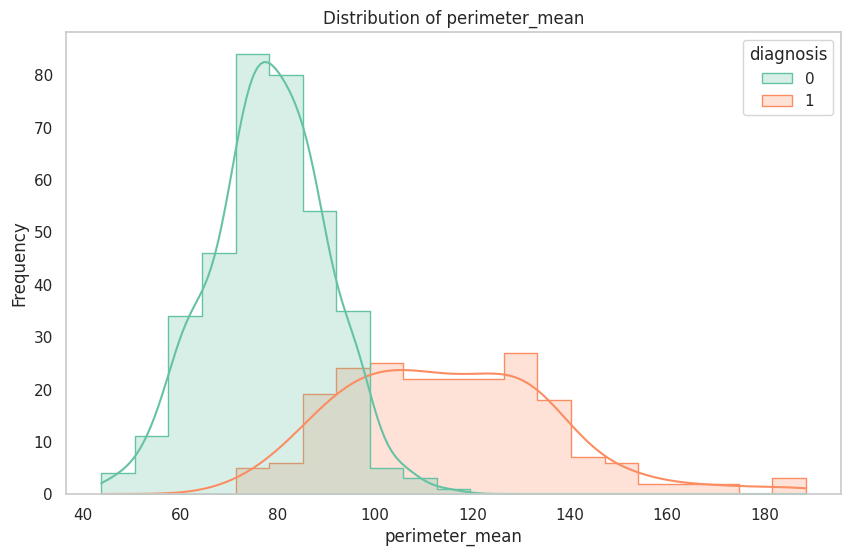

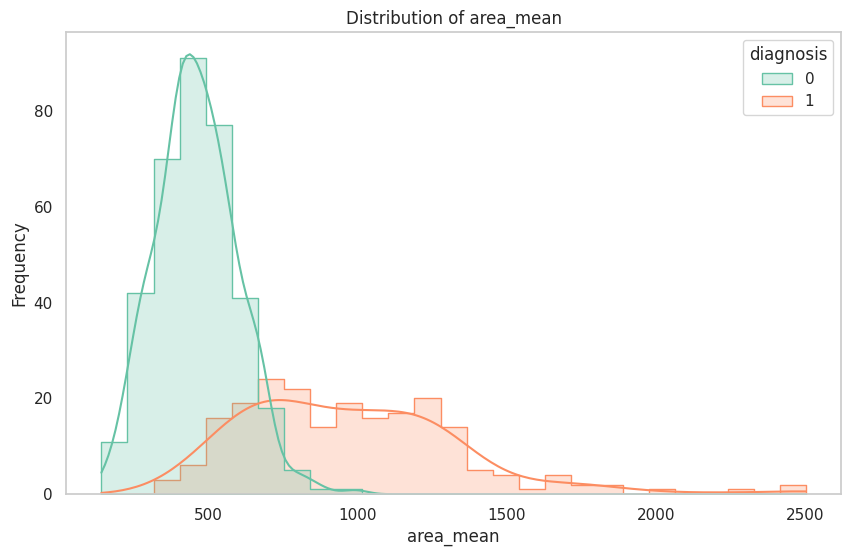

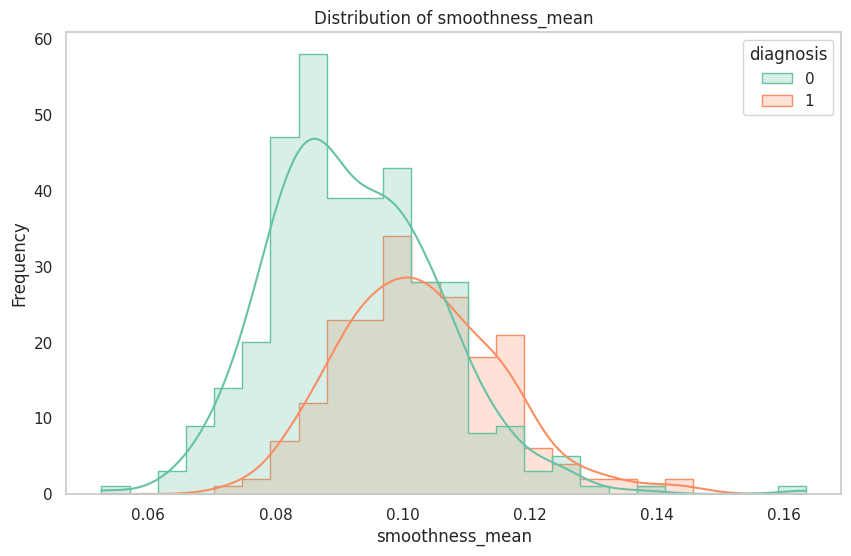

In [21]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df, x=feature, hue='diagnosis', kde=True, element='step', palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(False)
plt.show()

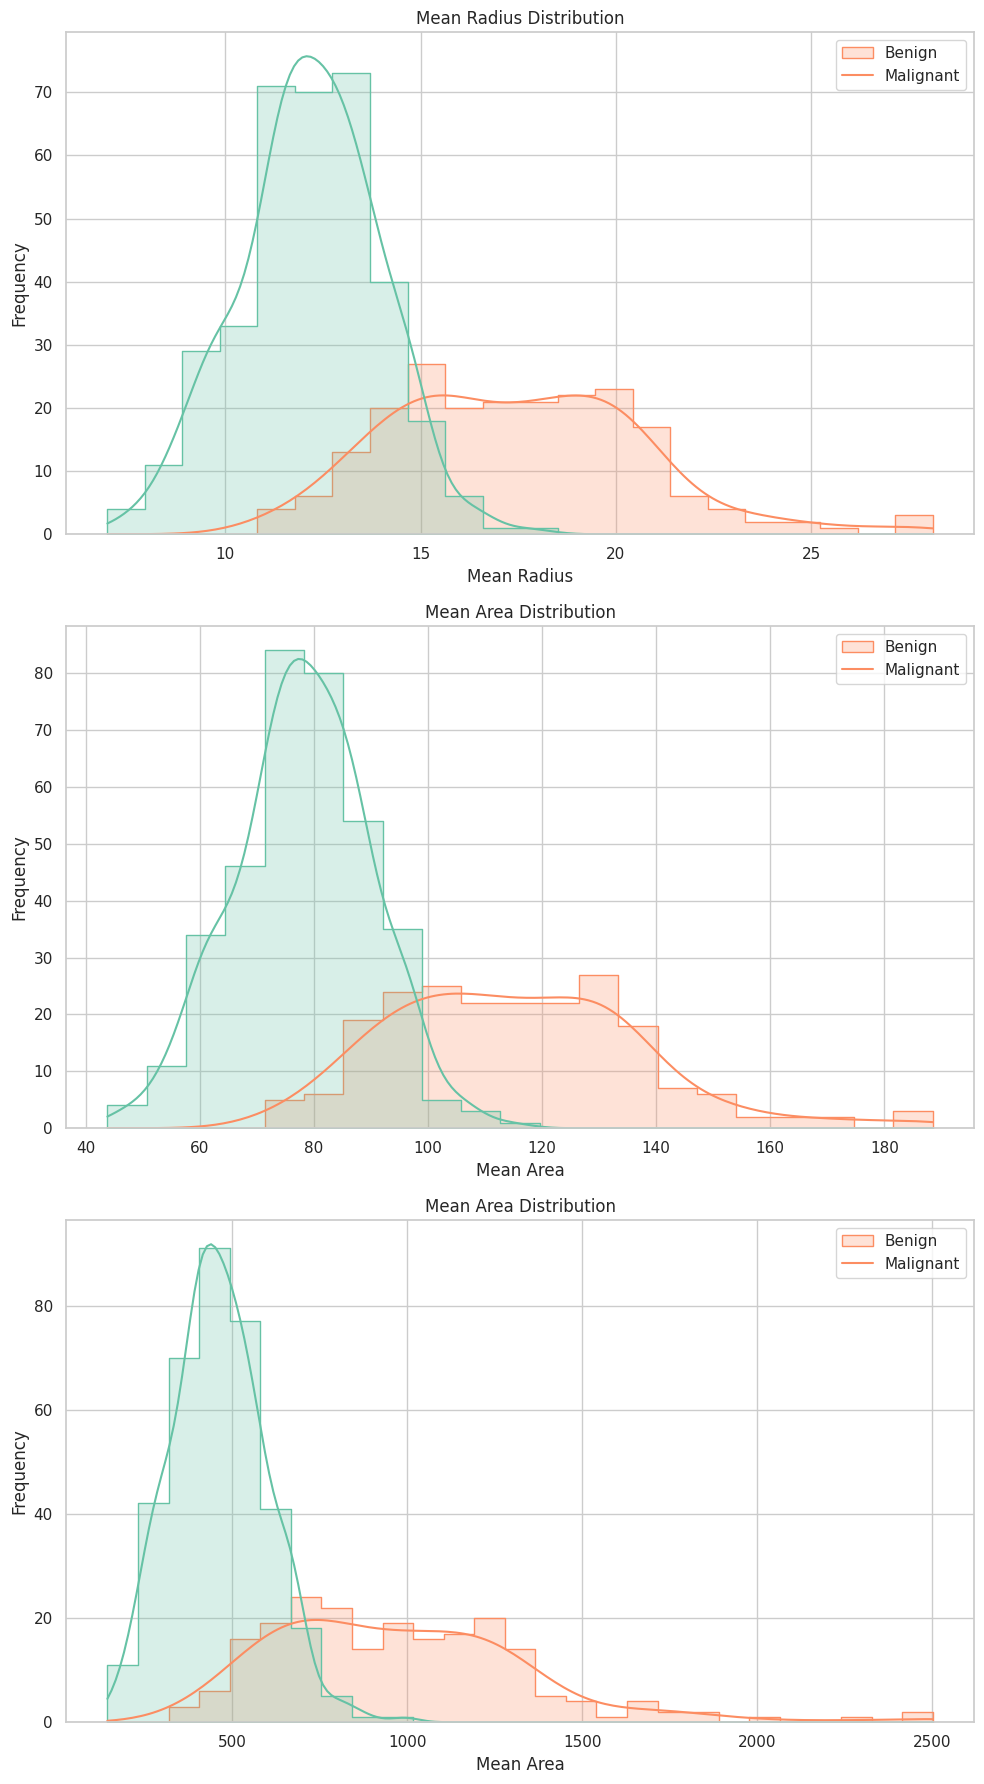

In [22]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Mean Radius Distribution
sns.histplot(train_df, x='radius_mean', hue='diagnosis', kde=True, element='step', palette='Set2', ax=axes[0])
axes[0].set_title('Mean Radius Distribution')
axes[0].set_xlabel('Mean Radius')
axes[0].set_ylabel('Frequency')
axes[0].legend(['Benign', 'Malignant'])

# Mean Perimeter Distribution
sns.histplot(train_df, x='perimeter_mean', hue='diagnosis', kde=True, element='step', palette='Set2', ax=axes[1])
axes[1].set_title('Mean Area Distribution')
axes[1].set_xlabel('Mean Area')
axes[1].set_ylabel('Frequency')
axes[1].legend(['Benign', 'Malignant'])

# Mean Area Distribution
sns.histplot(train_df, x='area_mean', hue='diagnosis', kde=True, element='step', palette='Set2', ax=axes[2])
axes[2].set_title('Mean Area Distribution')
axes[2].set_xlabel('Mean Area')
axes[2].set_ylabel('Frequency')
axes[2].legend(['Benign', 'Malignant'])

# Adjust the layout
plt.tight_layout()
plt.show()

#Correlation analysis

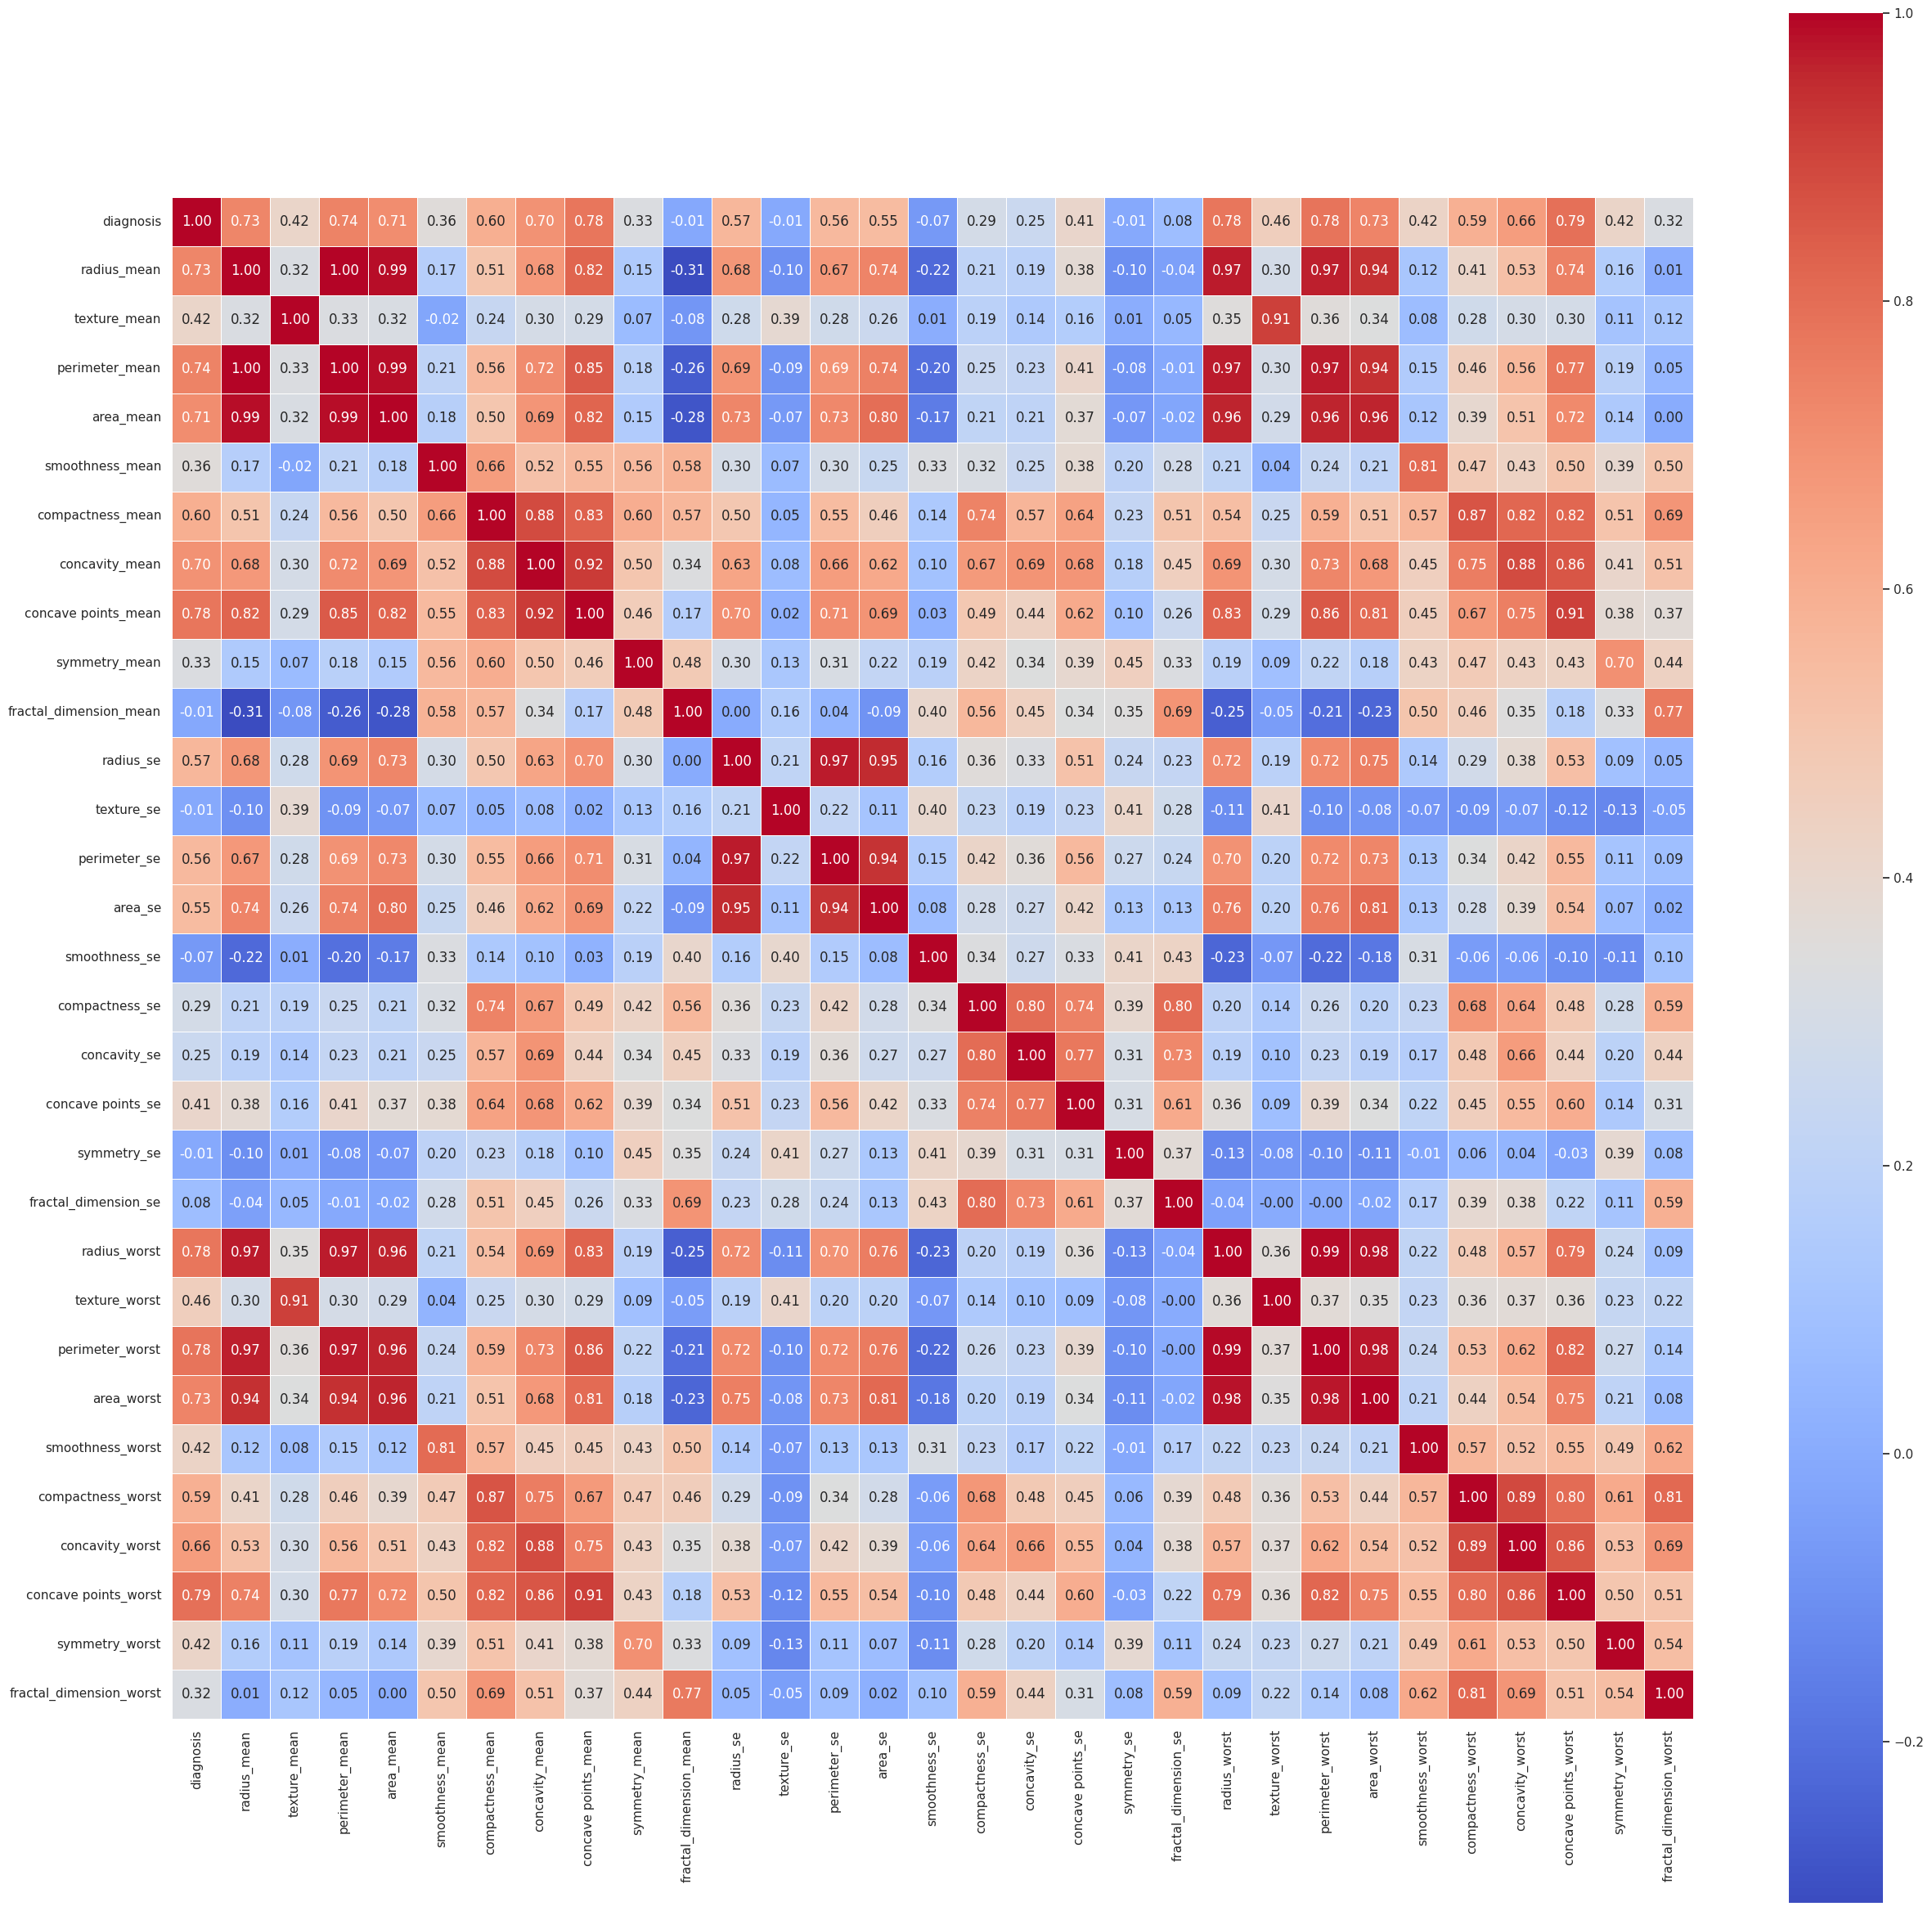

In [23]:
# 5. Correlation between variables
data_corr = train_df.corr()

f,ax = plt.subplots(figsize=(30, 30))
sns.heatmap(data_corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)

# Sets the output file name and format (PNG in the example)
output_file = "data_corr.png"
plt.savefig(output_file, format="png")

# Optional to show the graph on the screen
plt.show()

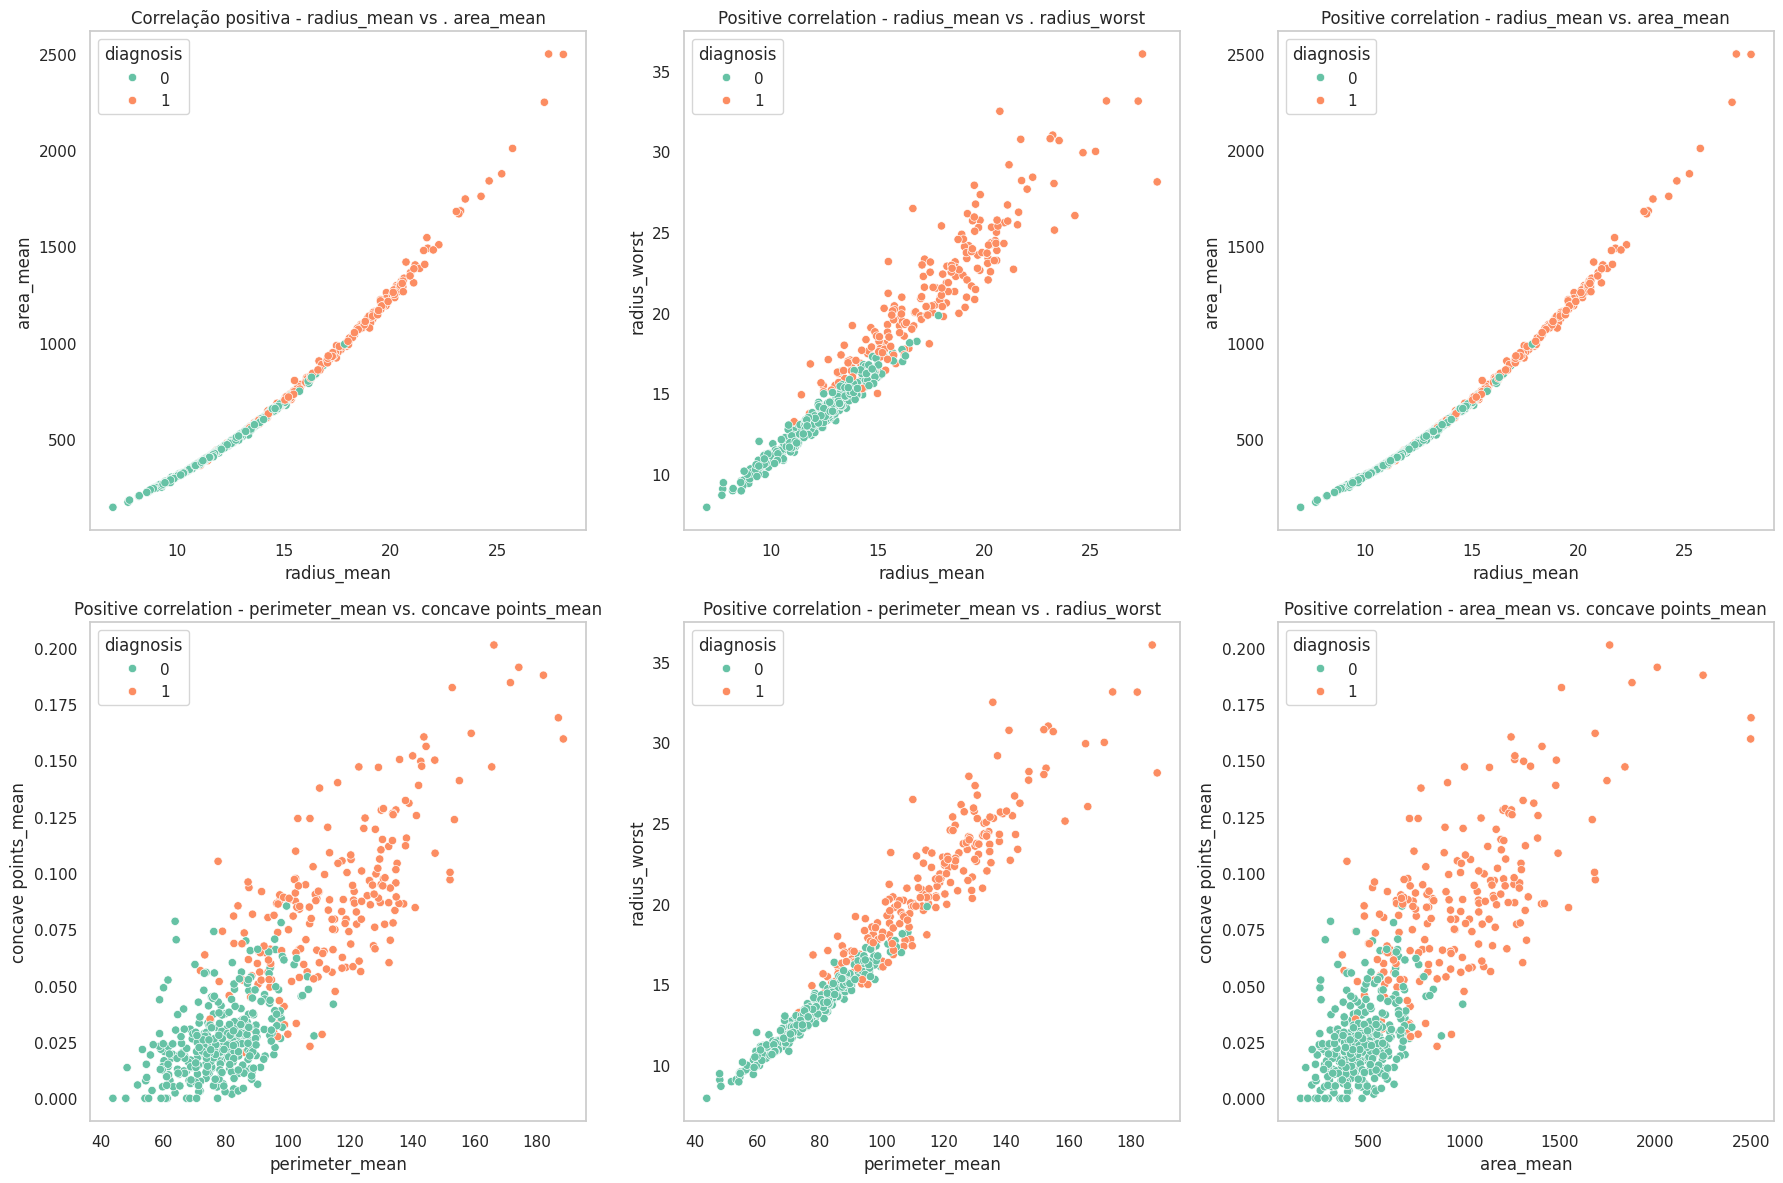

In [24]:
# Figure size configuration
plt.figure(figsize=(18, 12))
# Subplot 1: radius_mean vs. area_mean
plt.subplot(2, 3, 1)
sns.scatterplot(x="radius_mean", y="area_mean", hue='diagnosis', data=train_df, palette='Set2')
plt.title("Correlação positiva - radius_mean vs . area_mean")
plt.grid(False)

# Subplot 2: radius_mean vs. radius_worst
plt.subplot(2, 3, 2)
sns.scatterplot(x="radius_mean", y="radius_worst", hue='diagnosis', data=train_df, palette='Set2')
plt.title("Positive correlation - radius_mean vs . radius_worst")
plt.grid(False)

# Subplot 3: radius_mean vs. area_mean (Repeated?)
plt.subplot(2, 3, 3)
sns.scatterplot(x="radius_mean", y="area_mean", hue='diagnosis', data=train_df, palette='Set2')
plt.title("Positive correlation - radius_mean vs. area_mean")
plt.grid(False)

# Subplot 4: perimeter_mean vs. concave points_mean
plt.subplot(2, 3, 4)
sns.scatterplot(x="perimeter_mean", y="concave points_mean", hue='diagnosis', data=train_df, palette='Set2')
plt.title("Positive correlation - perimeter_mean vs. concave points_mean")
plt.grid(False)

# Subplot 5: perimeter_mean vs. radius_worst
plt.subplot(2, 3, 5)
sns.scatterplot(x="perimeter_mean", y="radius_worst", hue='diagnosis', data=train_df, palette='Set2')
plt.title("Positive correlation - perimeter_mean vs . radius_worst")
plt.grid(False)

# Subplot 6: area_mean vs. concave points_mean
plt.subplot(2, 3, 6)
sns.scatterplot(x="area_mean", y="concave points_mean", hue='diagnosis', data=train_df, palette='Set2')
plt.title("Positive correlation - area_mean vs. concave points_mean")
plt.grid(False)

# Adjust the layout
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

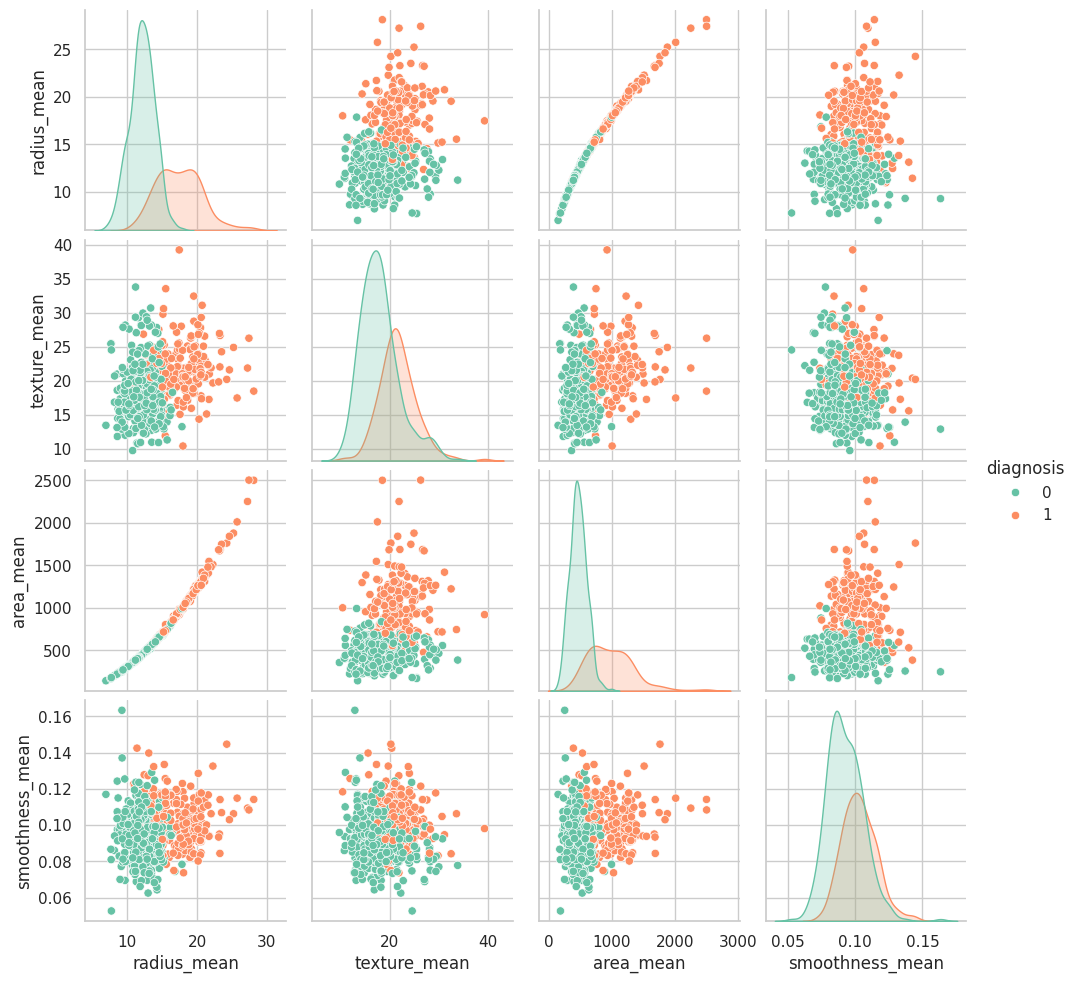

In [25]:
# Pairplot graph
plt.figure(figsize=(14, 6))

sns.pairplot(train_df, hue='diagnosis',
             vars=['radius_mean',
                   'texture_mean',
                   'area_mean',
                   'smoothness_mean'], palette='Set2')

# Sets the output file name and format (PNG in the example)
output_file = "pairplot.png"
plt.savefig(output_file, format="png")

# Optional to show the graph on the screen
plt.show()

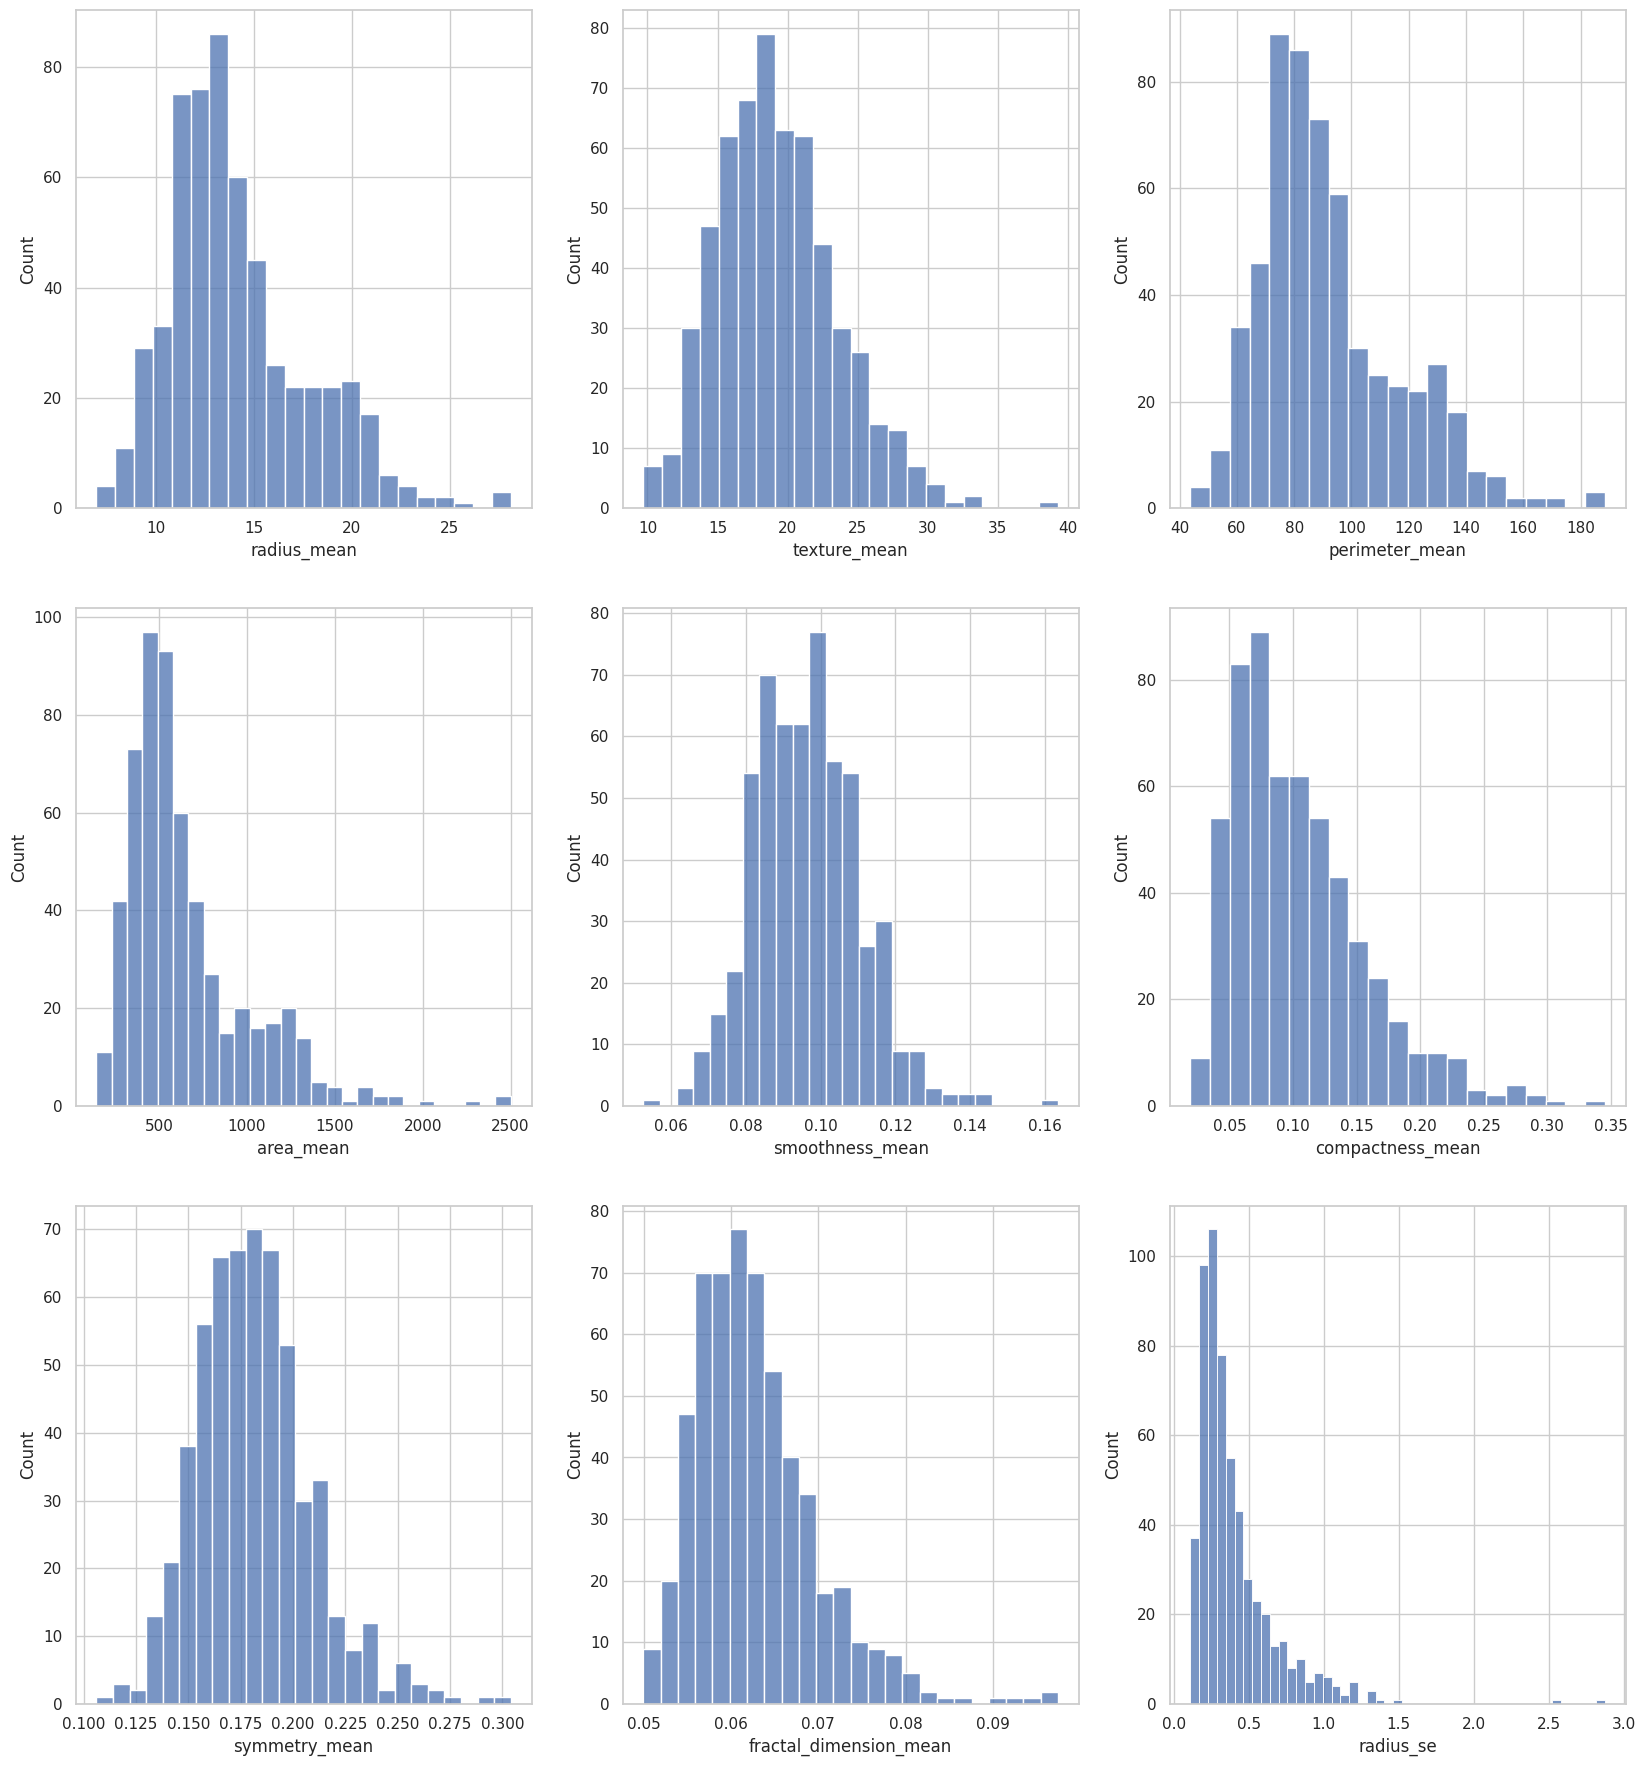

In [26]:
# Chart subplots histplot
fig , axes = plt.subplots(nrows=3, ncols=3 , figsize = (20, 22))
ax = sns.histplot(train_df["radius_mean"] , ax=axes[0, 0], palette='Set2')
ax = sns.histplot(train_df["texture_mean"] , ax=axes[0, 1], palette='Set2')
ax = sns.histplot(train_df["perimeter_mean"] , ax=axes [0, 2], palette='Set2')
ax = sns.histplot(train_df["area_mean"], ax=axes[1, 0], palette='Set2')
ax = sns.histplot(train_df["smoothness_mean"] , ax=axes[1, 1], palette='Set2')
ax = sns.histplot(train_df["compactness_mean"] , ax=axes[1, 2], palette= 'Set2')
ax = sns.histplot(train_df["symmetry_mean"] , ax=axes[2, 0], palette='Set2')
ax = sns.histplot(train_df["fractal_dimension_mean"], ax=axes[2 , 1], palette='Set2')
ax = sns.histplot(train_df["radius_se"], ax=axes[2, 2], palette='Set2')

# Defines the output file name and format ( PNG in the example)
output_file = "subplots_histplot.png"
plt.savefig(output_file, format="png")

# Optional to show the plot on screen
plt.show()

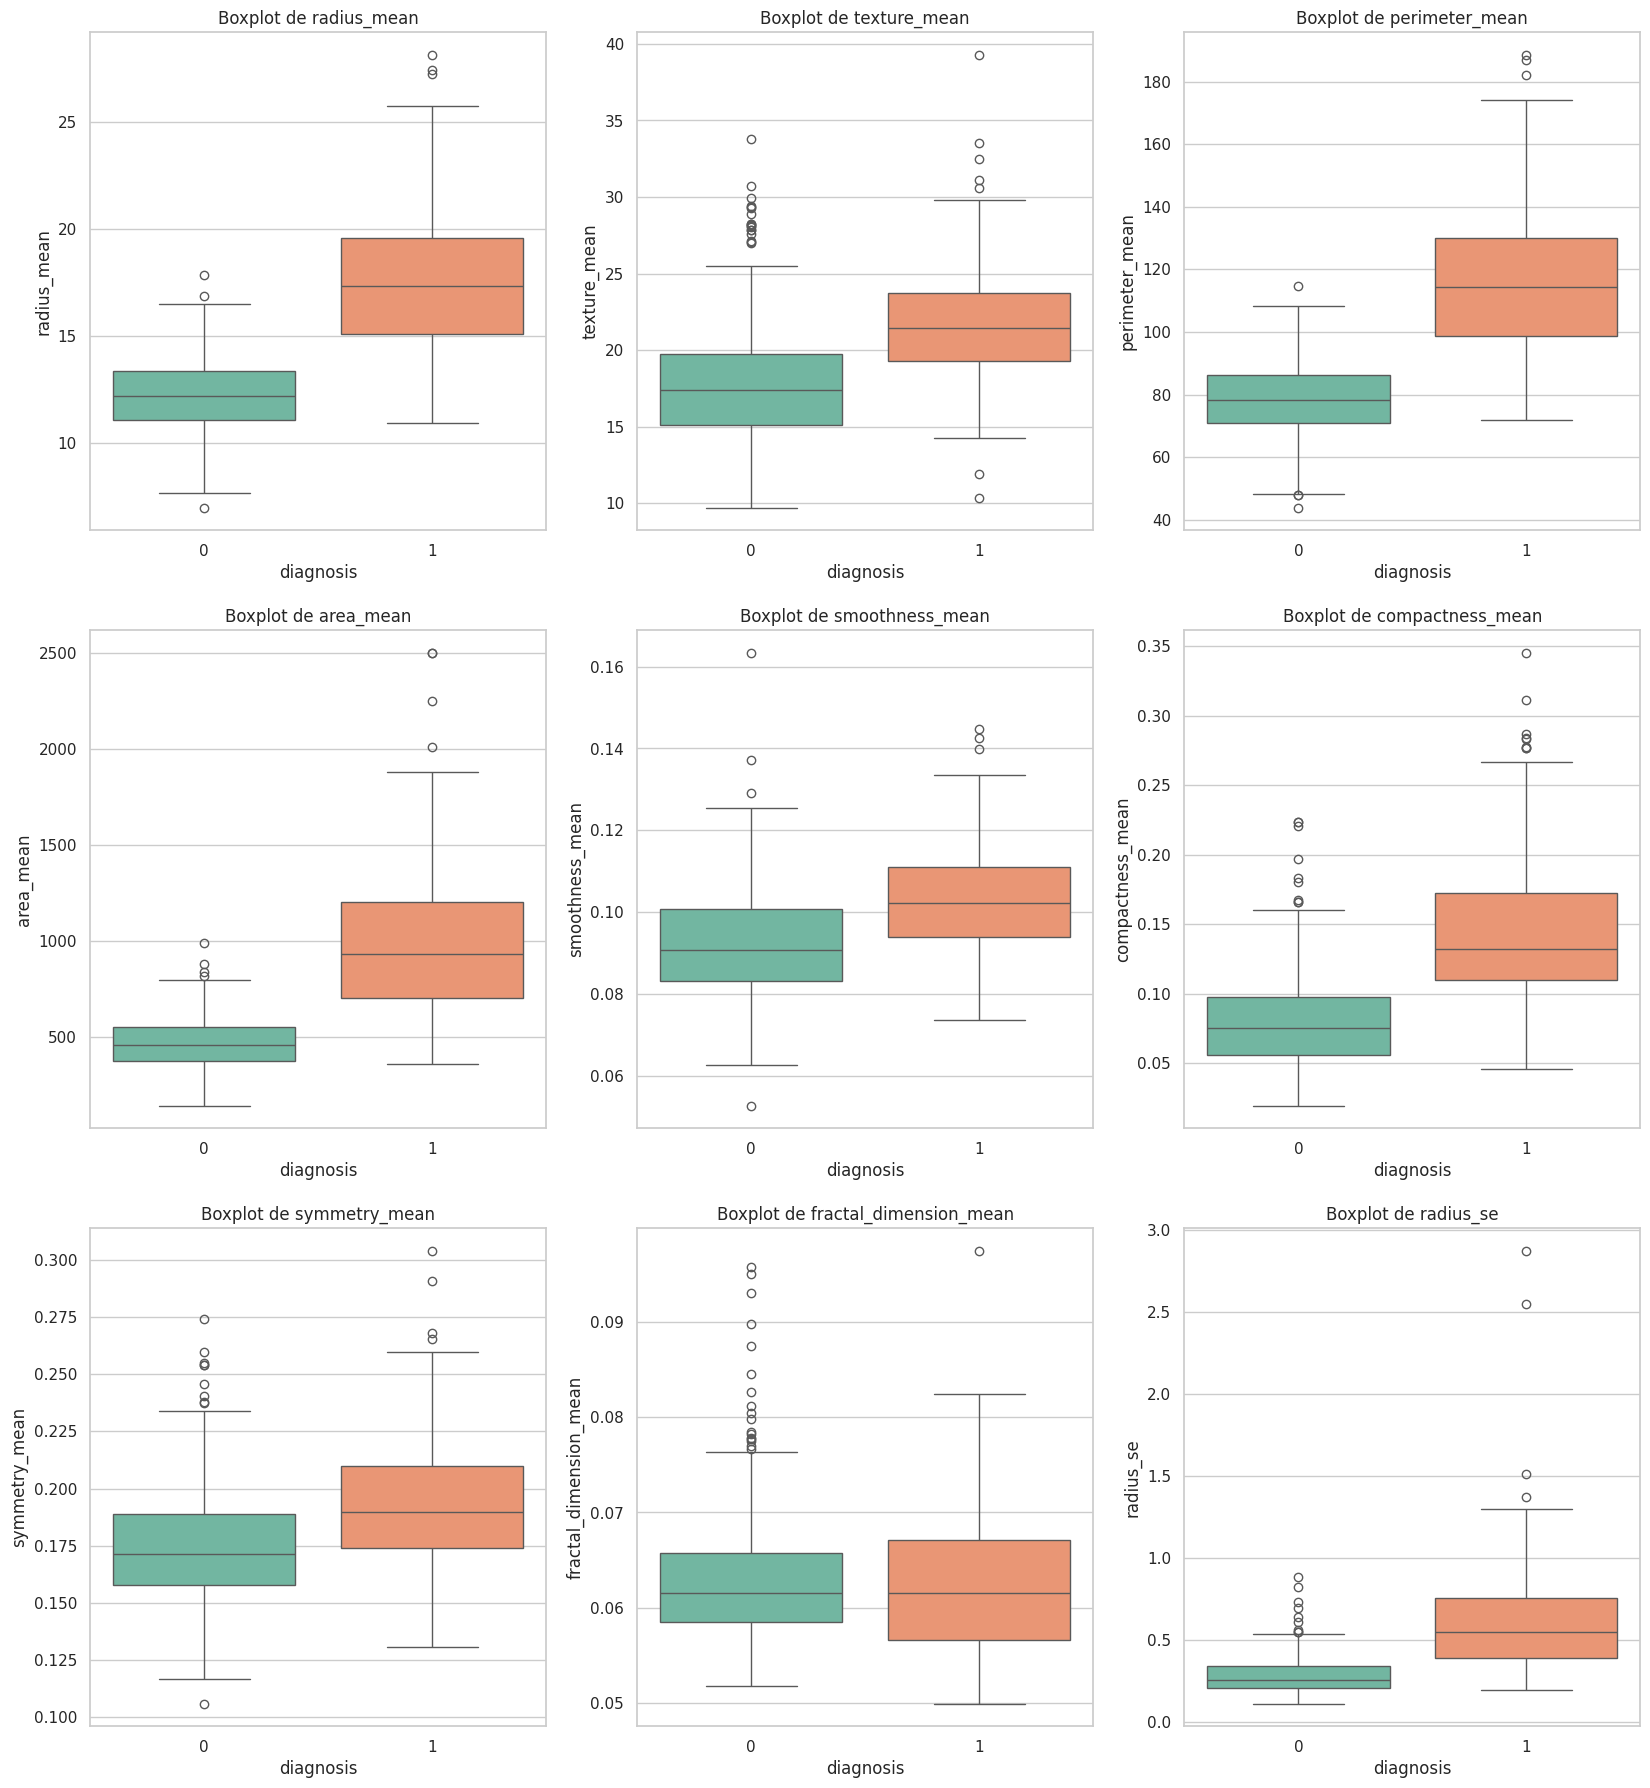

In [27]:
# Select variables for boxplot plots
selected_features = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se"]

# Matrix of boxplot plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 22))
for i, feature in enumerate(selected_features):
    row, col = divmod(i, 3)
    ax = sns.boxplot(x="diagnosis", y=feature, data=train_df, ax=axes[row, col], palette='Set2')
    ax.set_title(f'Boxplot de {feature}')

# Sets the output file name and format (PNG in the example)
output_file = "subplots_boxplot.png"
plt.savefig(output_file, format="png")

# Optional to display the graph on the screen
plt. show()

In [28]:
# 1. Handling Missing Values
print("Number of missing values ​​per column:")
print(train_df.isnull().sum())

Number of missing values ​​per column:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [29]:
# 1. Handling Missing Values
print("Number of missing values ​​per column:")
print(train_df.isnull().sum())

Number of missing values ​​per column:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


#Feature Engineering

In [30]:
# Importing library
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()

# Aplicando nas colunas transformando em númericas
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Viewing
label_encoder

LabelEncoder()

In [31]:
# Viewing
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [32]:
# Resources
X = df.drop(columns=['diagnosis'])

# Target variable
y = df['diagnosis']

In [33]:
# Visualizing data x
X.shape

(569, 30)

In [34]:
# Viewing y data
y.shape

(569,)

#Model Training

In [35]:
# Importing library
from sklearn.model_selection import train_test_split

# Training and testing division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Viewing training data
print("Viewing rows and columns given by X train", X_train.shape)

# Viewing test data
print("Viewing rows and columns given y train", y_train.shape)

Viewing rows and columns given by X train (455, 30)
Viewing rows and columns given y train (455,)


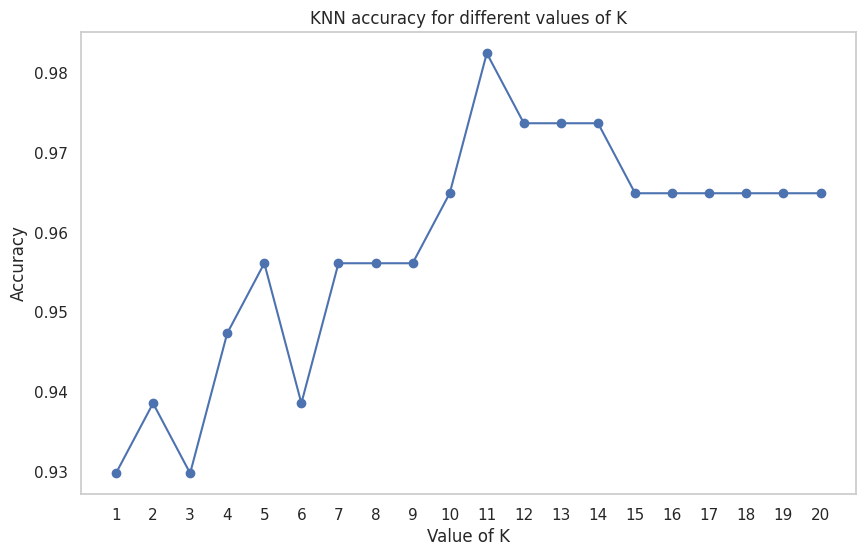

Best value of K: 11
Corresponding accuracy: 0.9824561403508771


In [36]:
# Importing KKN library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Find the ideal value of K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN accuracy for different values ​​of K')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(False)
plt.show()

# Find the value of K with the greatest accuracy
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best value of K: {best_k}")
print(f"Corresponding accuracy: {best_accuracy}")

In [39]:
%%time

# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


# Models to be evaluated
models = [
    # Naive Bayes Model
    GaussianNB(),

    # Decision Tree Model
    DecisionTreeClassifier(random_state=42),

    # Random forest model
    RandomForestClassifier(n_estimators=100, random_state=42),

    # Logistic regression model
    LogisticRegression(random_state=50),

    # Ada Boost Model
    AdaBoostClassifier(random_state=45),

    # XGBoost Model
    # Parameter tree_method='gpu_hist' for XGBoost GPU
    XGBClassifier(tree_method='gpu_hist', random_state=42),

    # K-Nearest Neighbors Model
    KNeighborsClassifier(n_neighbors=5),  # substitua 'best_k' pelo valor apropriado

    # Support Vector Classifier with GPU support (using cuML's SVC)
    SVC(kernel='linear', probability=True, random_state=42),

    # Gradient Boosting Classifier
    GradientBoostingClassifier(random_state=42),


]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("-----------------")

Model 1: GaussianNB
Training Accuracy: 0.9362637362637363
Testing Accuracy: 0.9736842105263158
-----------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9473684210526315
-----------------
Model 3: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9649122807017544
-----------------
Model 4: LogisticRegression
Training Accuracy: 0.945054945054945
Testing Accuracy: 0.956140350877193
-----------------
Model 5: AdaBoostClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9736842105263158
-----------------
Model 6: XGBClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.956140350877193
-----------------
Model 7: KNeighborsClassifier
Training Accuracy: 0.9406593406593406
Testing Accuracy: 0.956140350877193
-----------------
Model 8: SVC
Training Accuracy: 0.9692307692307692
Testing Accuracy: 0.956140350877193
-----------------
Model 9: GradientBoostingClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.956140350877193
-----------------
CP

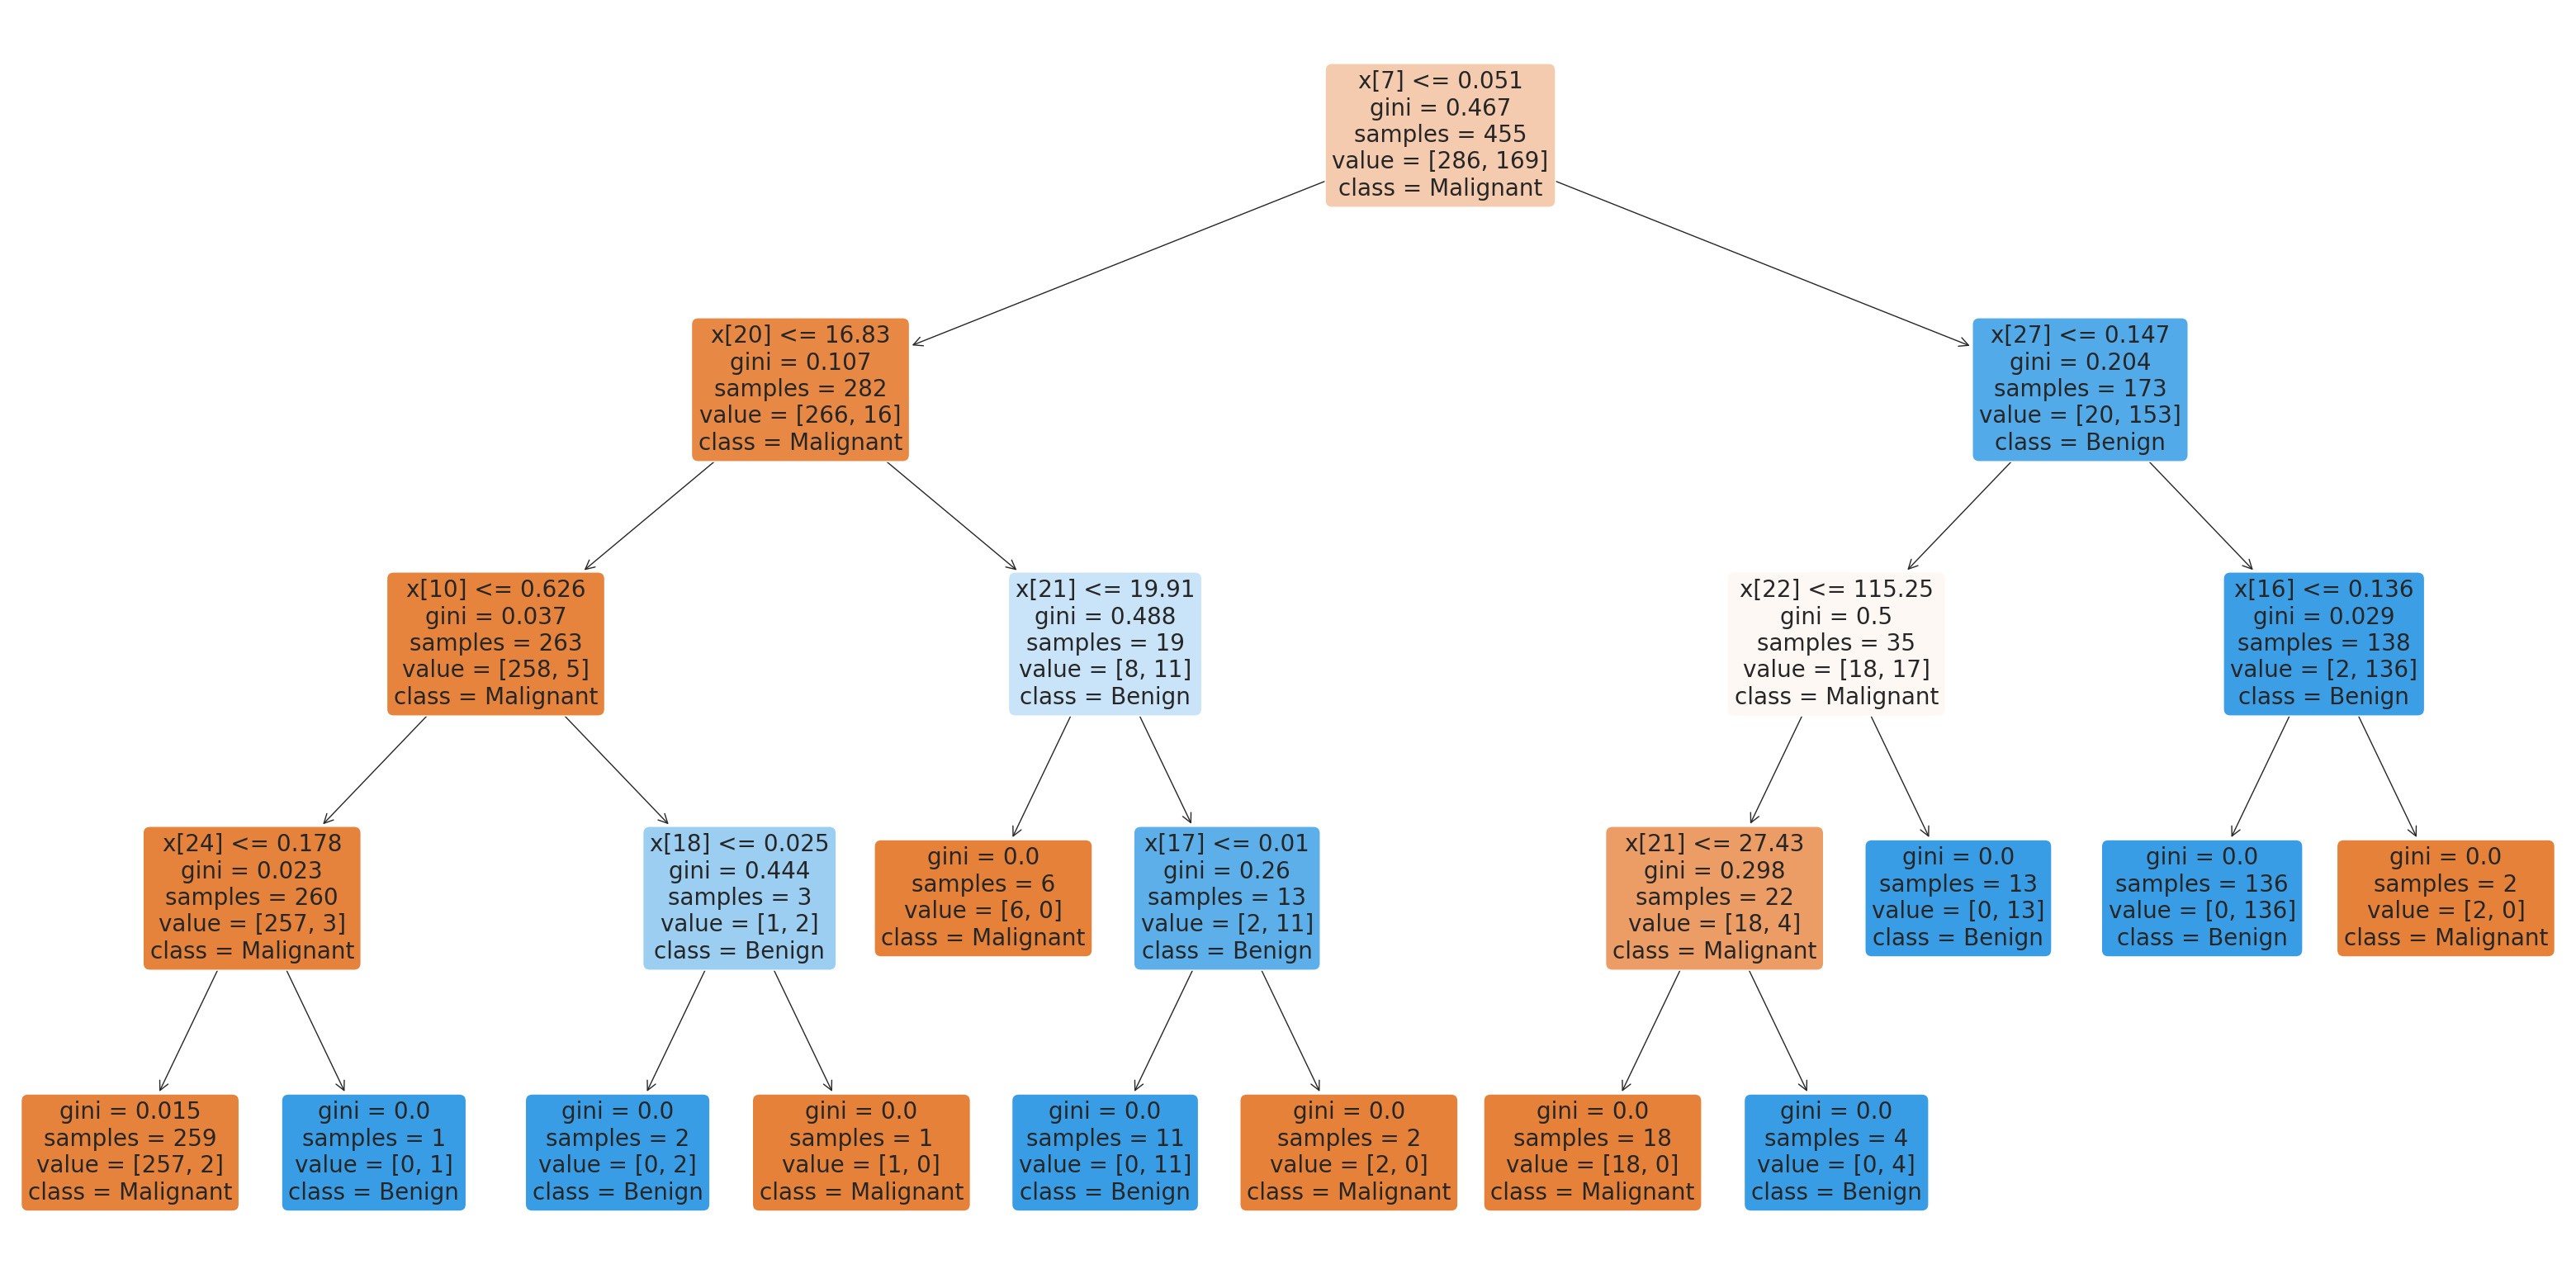

In [40]:
# Importing library
from sklearn.tree import DecisionTreeClassifier

# Creating decision tree model
model_dtc = DecisionTreeClassifier(max_depth = 4, random_state = 0)

# Model training
model_dtc_fit = model_dtc.fit(X_train, y_train)

#plot tree
# importing library to plot trees
from sklearn import tree
fig, ax = plt.subplots(figsize=(40, 20), facecolor = "w")
tree.plot_tree(model_dtc,
               ax = ax,
               fontsize = 20,
               rounded = True,
               filled = True,
               class_names = ["Malignant", "Benign"])
plt.show()

In [41]:
# accuracy_score and y_train y_test
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Testing Accuracy: 0.956140350877193


In [42]:
# Step 7: Make predictions on the test set
predictions = model.predict(X_test)

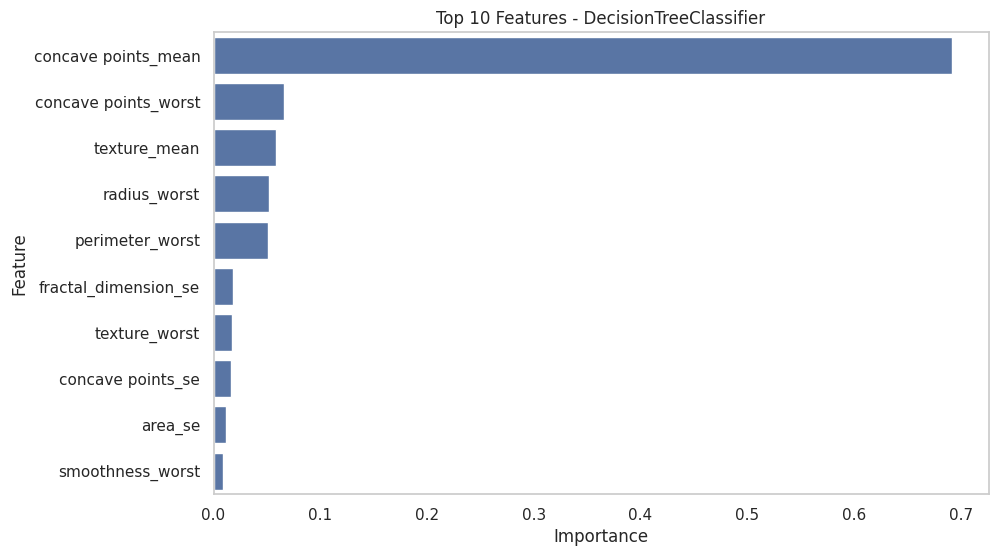

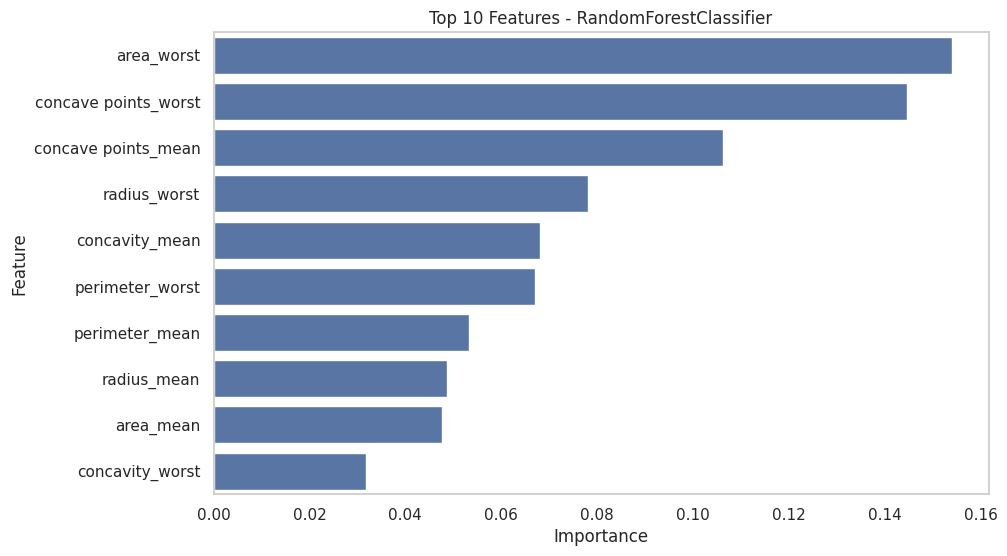

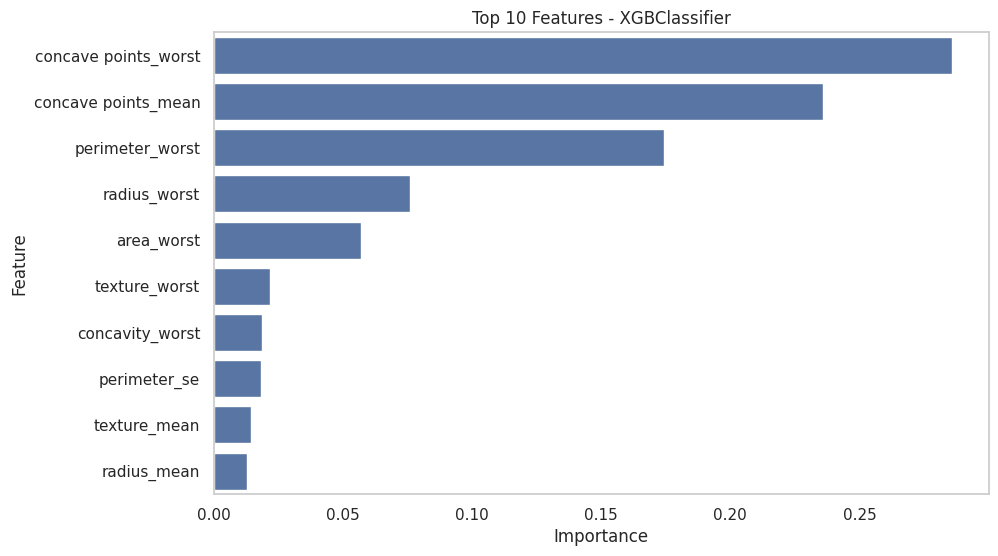

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 169, number of negative: 286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371429 -> initscore=-0.526093
[LightGBM] [Info] Start training from score -0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [44]:
# Train models that support feature importances
models_with_feature_importances = [("DecisionTreeClassifier", DecisionTreeClassifier(random_state=42)),
                                   ("RandomForestClassifier", RandomForestClassifier(n_estimators=100, random_state=42)),
                                   ("XGBClassifier", XGBClassifier(random_state=42)),
                                   ("LGBMClassifier", LGBMClassifier(random_state=42))]

# Iterate over models
for model_name, model in models_with_feature_importances:

    # Train model
    model.fit(X_train, y_train)

    # Get importance of features
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    else:
        # If the model does not have feature_importances_, continue to the next model
        print(f"{model_name} does not support feature importances.")
        continue

    # Create DataFrame for easier viewing
    feature_importances_df = pd.DataFrame({'Feature': X_train.columns,
                                           'Importance': feature_importances})

    # Sort by importance
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df[:10])
    plt.title(f"Top 10 Features - {model_name}")
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(False)
    plt.show()

#Model Matrices

Model 1: GaussianNB
Training Accuracy: 0.9362637362637363
Testing Accuracy: 0.9736842105263158


Confusion matrix 

 [[71  0]
 [ 3 40]]

True Positives(TP) =  71

True Negatives(TN) =  40

False Positives(FP) =  0

False Negatives(FN) =  3



------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9473684210526315


Confusion matrix 

 [[68  3]
 [ 3 40]]

True Positives(TP) =  68

True Negatives(TN) =  40

False Positives(FP) =  3

False Negatives(FN) =  3



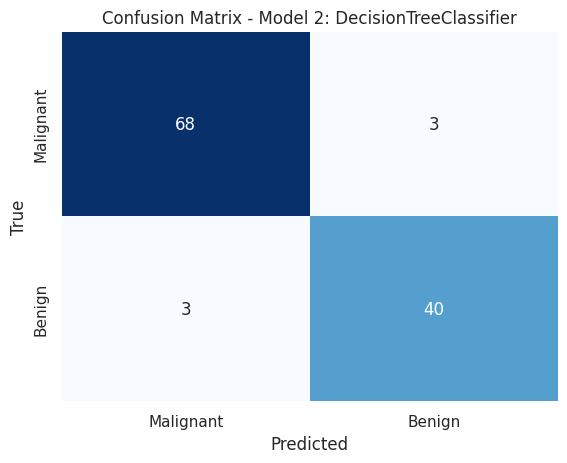

------------------
Model 3: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9649122807017544


Confusion matrix 

 [[70  1]
 [ 3 40]]

True Positives(TP) =  70

True Negatives(TN) =  40

False Positives(FP) =  1

False Negatives(FN) =  3



------------------
Model 4: LogisticRegression
Training Accuracy: 0.945054945054945
Testing Accuracy: 0.956140350877193


Confusion matrix 

 [[70  1]
 [ 4 39]]

True Positives(TP) =  70

True Negatives(TN) =  39

False Positives(FP) =  1

False Negatives(FN) =  4



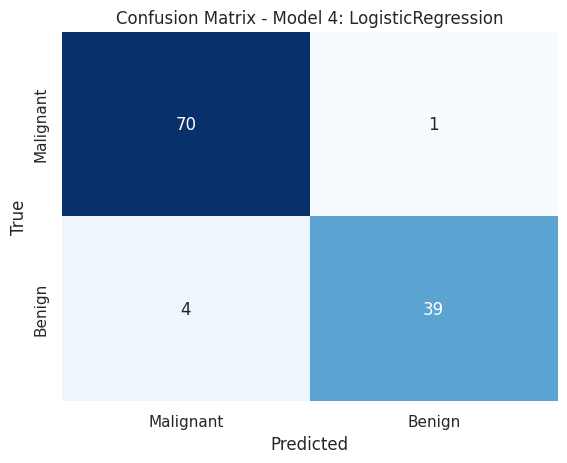

------------------
Model 5: AdaBoostClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9736842105263158


Confusion matrix 

 [[70  1]
 [ 2 41]]

True Positives(TP) =  70

True Negatives(TN) =  41

False Positives(FP) =  1

False Negatives(FN) =  2



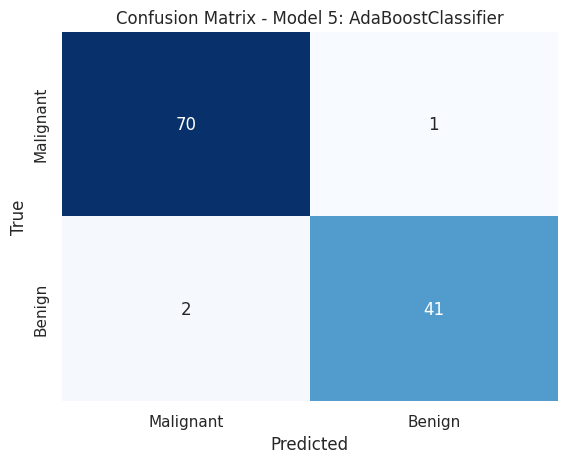

------------------
Model 6: XGBClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.956140350877193


Confusion matrix 

 [[69  2]
 [ 3 40]]

True Positives(TP) =  69

True Negatives(TN) =  40

False Positives(FP) =  2

False Negatives(FN) =  3



------------------
Model 7: KNeighborsClassifier
Training Accuracy: 0.9406593406593406
Testing Accuracy: 0.956140350877193


Confusion matrix 

 [[71  0]
 [ 5 38]]

True Positives(TP) =  71

True Negatives(TN) =  38

False Positives(FP) =  0

False Negatives(FN) =  5



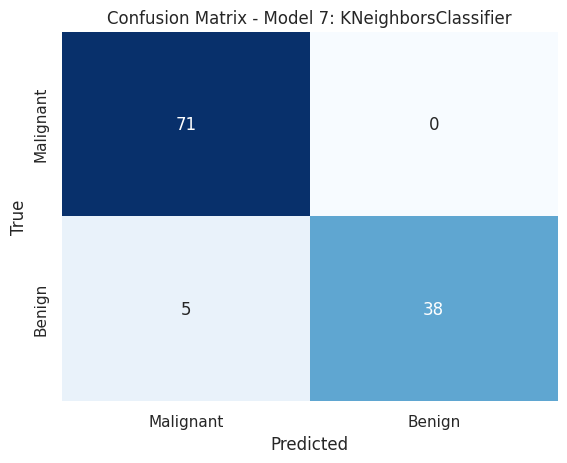

------------------
Model 8: SVC
Training Accuracy: 0.9692307692307692
Testing Accuracy: 0.956140350877193


Confusion matrix 

 [[70  1]
 [ 4 39]]

True Positives(TP) =  70

True Negatives(TN) =  39

False Positives(FP) =  1

False Negatives(FN) =  4



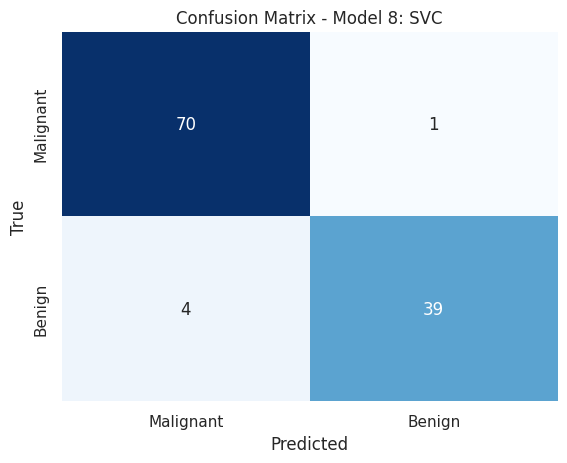

------------------
Model 9: GradientBoostingClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.956140350877193


Confusion matrix 

 [[69  2]
 [ 3 40]]

True Positives(TP) =  69

True Negatives(TN) =  40

False Positives(FP) =  2

False Negatives(FN) =  3



------------------


In [45]:
# plot matrix confusion
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print()

    # Calculate and plot the confusion matrix
    cm = confusion_matrix(y_test, model.predict(X_test))
    print()
    print('Confusion matrix \n\n', cm)
    print('\nTrue Positives(TP) = ', cm[0,0])
    print('\nTrue Negatives(TN) = ', cm[1,1])
    print('\nFalse Positives(FP) = ', cm[0,1])
    print('\nFalse Negatives(FN) = ', cm[1,0])
    print()
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Malignant", "Benign"],
                yticklabels=["Malignant", "Benign"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - Model {i+1}: {type(model).__name__}")
    plt.show()
    print("------------------")


In [48]:
# Importing library - classification_report models
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Models to be evaluated
models = [
          GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          LGBMClassifier(),
          ]


# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print()

    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Generate rating report
    report = classification_report(y_test, model.predict(X_test))
    print()
    print("Classification Report:")
    print()
    print(report)
    print()

    print("=======================================")


Model 1: GaussianNB

Training Accuracy: 0.9362637362637363
Testing Accuracy: 0.9736842105263158

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Model 2: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.9473684210526315

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Model 3: KNeighborsClassifier

Training Accuracy: 0.9406593406593406
Testing Accuracy: 0.9561403508771

#Deep Learning

In [49]:
# Importing libraries

# Importing libraries train test model
from sklearn.model_selection import train_test_split

# Importing library scaling
from sklearn.preprocessing import StandardScaler

# Importing library Neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers


In [50]:
# Database
data = pd.read_csv("/content/data (1).csv")
data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871     1.0950      0.9053   
1           0.1812                 0.05667     0.5435      0.7339   
2           0.2069                 0.05999     0.7456      0.7869   
3           0.2597                 0.09744     0.4956      1.1560   
4           0.1809                 0.05883     0.7572      0.7813   
..             ...                     ...        ...         ...   
564         0.1726                 0.05623     1.1760      1.2560   
565         0.1752                 0.05533     0.7655      2.4630   
566         0.1590                 0.05648     0.4564      1.0750   
567         0.2397                 0.07016     0.7260      1.5950   
568         0.1587                 0.05884     0.3857      1.4280   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
0           8.589   153.40       0.006399         0.04904       0.05373   
1           3.398    74.08       0.005225         0.01308       0.01860   
2           4.585    94.03       0.006150         0.04006       0.03832   
3           3.445    27.23       0.009110         0.07458       0.05661   
4           5.438    94.44       0.011490         0.02461       0.05688   
..            ...      ...            ...             ...           ...   
564         7.673   158.70       0.010300         0.02891       0.05198   
565         5.203    99.04       0.005769         0.02423       0.03950   
566         3.425    48.55       0.005903         0.03731       0.04730   
567         5.772    86.22       0.006522         0.06158       0.07117   
568         2.548    19.15       0.007189         0.00466       0.00000   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0              0.01587      0.03003              0.006193        25.380   
1              0.01340      0.01389              0.003532        24.990   
2              0.02058      0.02250              0.004571        23.570   
3              0.01867      0.05963              0.009208  

In [51]:
# Remove ID column for analysis
data = data.drop(columns=['id'])
data = data.drop(columns=['Unnamed: 32'])

# # Viewing dataset
data

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871     1.0950      0.9053   
1           0.1812                 0.05667     0.5435      0.7339   
2           0.2069                 0.05999     0.7456      0.7869   
3           0.2597                 0.09744     0.4956      1.1560   
4           0.1809                 0.05883     0.7572      0.7813   
..             ...                     ...        ...         ...   
564         0.1726                 0.05623     1.1760      1.2560   
565         0.1752                 0.05533     0.7655      2.4630   
566         0.1590                 0.05648     0.4564      1.0750   
567         0.2397                 0.07016     0.7260      1.5950   
568         0.1587                 0.05884     0.3857      1.4280   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
0           8.589   153.40       0.006399         0.04904       0.05373   
1           3.398    74.08       0.005225         0.01308       0.01860   
2           4.585    94.03       0.006150         0.04006       0.03832   
3           3.445    27.23       0.009110         0.07458       0.05661   
4           5.438    94.44       0.011490         0.02461       0.05688   
..            ...      ...            ...             ...           ...   
564         7.673   158.70       0.010300         0.02891       0.05198   
565         5.203    99.04       0.005769         0.02423       0.03950   
566         3.425    48.55       0.005903         0.03731       0.04730   
567         5.772    86.22       0.006522         0.06158       0.07117   
568         2.548    19.15       0.007189         0.00466       0.00000   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0              0.01587      0.03003              0.006193        25.380   
1              0.01340      0.01389              0.003532        24.990   
2              0.02058      0.02250              0.004571        23.570   
3              0.01867      0.05963              0.009208        14.910   
4              0.01885      0.01756              0.005115        22.540   
..                 ...

In [52]:
# Encode categorical variables
label_encoder = LabelEncoder()

# Applying to columns transforming them into numeric
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Viewing
label_encoder

LabelEncoder()

In [53]:
# Separate the resources (X) and the target column (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [54]:
# Split data into training and validation sets
# Step 3: Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Viewing rows and columns
print("Viewing X_train rows and columns", X_train.shape)

# Viewing rows and columns
print("Viewing rows and columns y_train", y_train.shape)

Viewing X_train rows and columns (455, 30)
Viewing rows and columns y_train (455,)


In [55]:
# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Viewing
scaler

StandardScaler()

In [56]:
## Neural network

# Initialize the model
nn_model = Sequential()

# Add input layer and first hidden layer
nn_model.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))

# Add additional hidden layers
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(8, activation='relu'))

# Add output layer
nn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary - Neural network
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,101 (4.30 KB)

 Trainable params: 1,101 (4.30 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Train the model
history = nn_model.fit(X_train, y_train, epochs=350, batch_size=32, validation_split=0.2)

Epoch 1/350
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step - accuracy: 0.6241 - loss: 0.8065 - val_accuracy: 0.6374 - val_loss: 0.7072
Epoch 2/350
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6075 - loss: 0.6946 - val_accuracy: 0.6374 - val_loss: 0.6142
Epoch 3/350
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6476 - loss: 0.5927 - val_accuracy: 0.6374 - val_loss: 0.5483
Epoch 4/350
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6333 - loss: 0.5210 - val_accuracy: 0.6374 - val_loss: 0.4939
Epoch 5/350
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6409 - loss: 0.4742 - val_accuracy: 0.6374 - val_loss: 0.4527
Epoch 6/350
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6293 - loss: 0.4261 - val_accuracy: 0.6484 - val_loss: 0.4234
Epoch 7/350
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6790 - loss: 0.4005 - val_accuracy: 0.7253 - val_loss: 0.4014
Epoch 8/350
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8028 - loss: 0.3676 - val_accuracy: 0.835

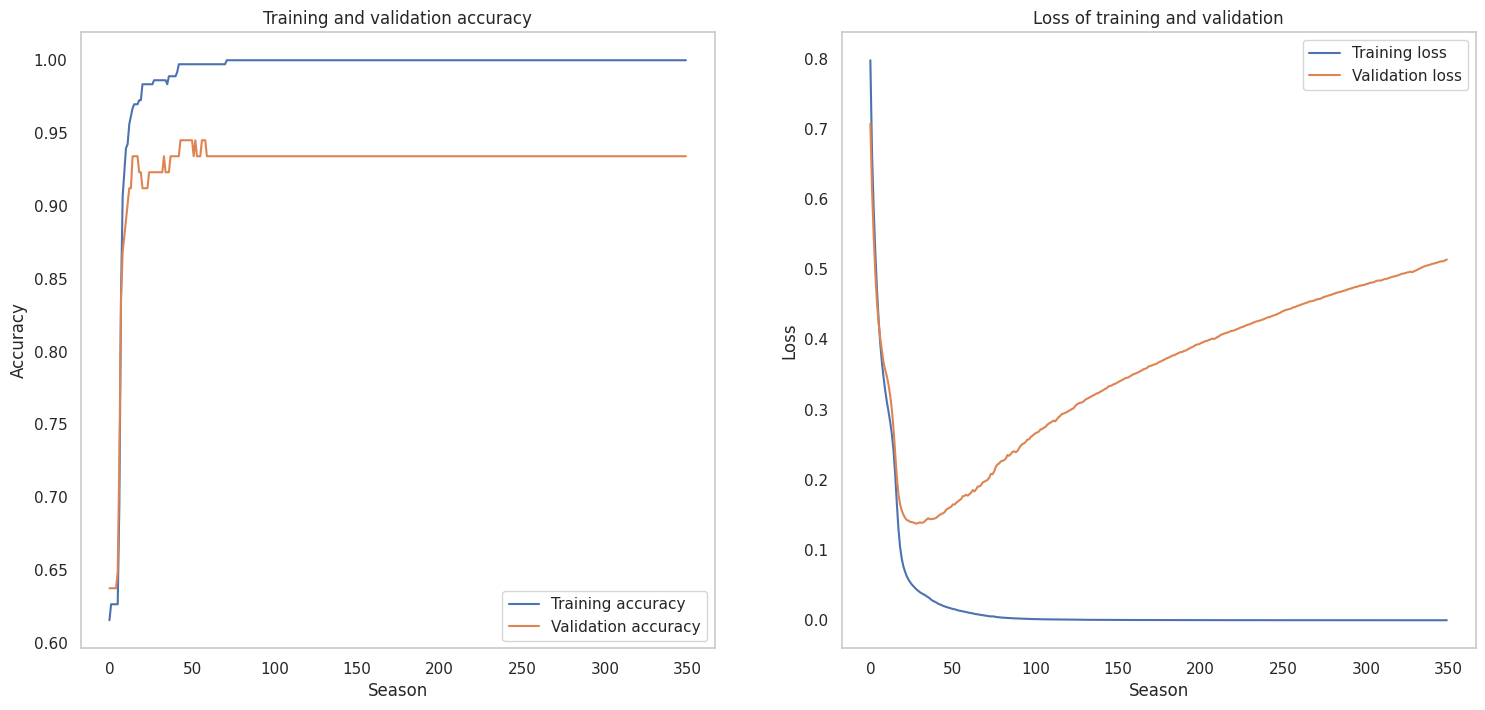

In [59]:
# Function to plot training and validation graphs
def plot_history(history):
    # Accuracy graph
    plt.figure(figsize=(18, 8))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Season')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and validation accuracy')
    plt.grid(False)

    # Loss graph
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Season')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Loss of training and validation')
    plt.grid(False)
    plt.show()

# Plot the graphs
plot_history(history)

In [60]:
# Evaluate the model
test_loss, test_accuracy = nn_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 0.9616 - loss: 0.3755
Test accuracy: 0.9561403393745422


In [61]:
# Make predictions
predictions_ANN = nn_model.predict(X_test)
predictions_ANN = (predictions_ANN > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_ANN)
print(f'Accuracy Neural network: {accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step
Accuracy Neural network: 0.956140350877193


In [62]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions_ANN)

# Display the confusion matrix using seaborn with labels 'Benign' and 'Malignant'
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Malignant", "Benign"],
            yticklabels=["Malignant", "Benign"])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Neural network')
plt.show()

In [63]:
# Confusion Matrix and Classification Report
print(classification_report(y_test, predictions_ANN))


              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [65]:
# Evaluate the model
nn_predictions_train = (nn_model.predict(X_train) > 0.5).astype(int)
nn_predictions_test = (nn_model.predict(X_test) > 0.5).astype(int)
nn_train_accuracy = accuracy_score(y_train, nn_predictions_train)
nn_test_accuracy = accuracy_score(y_test, nn_predictions_test)
nn_report = classification_report(y_test, nn_predictions_test, output_dict=True)

# Extract metrics of interest from the report
nn_metrics = {"Model": "NeuralNetwork",
              "Accuracy": nn_test_accuracy,
              "Precision": nn_report['weighted avg']['precision'],
              "Recall": nn_report['weighted avg']['recall'],
              "F1-score": nn_report['weighted avg']['f1-score'],
              "Support": nn_report['weighted avg']['support']
             }

# Models to be evaluated
models = [GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          SVC(kernel='linear', probability=True, random_state=42),
          GradientBoostingClassifier(random_state=42),
          LGBMClassifier()]

# List to store metrics for each model
metricas = []

# Evaluate each model
for model in models:
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    report = classification_report(y_test, model.predict(X_test), output_dict=True)

    # Extract metrics of interest from the report
    metrics = {"Model": type(model).__name__,
               "Accuracy": test_accuracy,
               "Precision": report['weighted avg']['precision'],
               "Recall": report['weighted avg']['recall'],
               "F1-score": report['weighted avg']['f1-score'],
               "Support": report['weighted avg']['support']
              }
    metricas.append(metrics)

# Add neural network metrics to the list
metricas.append(nn_metrics)

# Convert the list of dictionaries into a DataFrame
df_metricas = pd.DataFrame(metricas)

# Function to highlight the maximum value in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the highlighting function
df_metricas_styled = df_metricas.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1-score'])

# Display the styled DataFrame with metrics
df_metricas_styled

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[LightGBM] [Info] Number of positive: 169, number of negative: 286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4540
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371429 -> initscore=-0.526093
[LightGBM] [Info] Start training from score -0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 